# Generate a Norm Expression and evaluate it's likelihood

In [3]:
from environment import *
from actions import *
from robot_task_2 import *
from rules_2 import print_rule,expand
from combine_subtask import aggregate

import matplotlib.pyplot as plt
import numpy as np
from itertools import permutations
import pickle
from copy import deepcopy

### Initialise the environment and visualise it
Environment is by-default initialised with 20 objects. Each object has an object_id,colour,shape,last_action and position attribute.
There also exist 3 predefined zones (namely red,green and blue zones) in the environment.

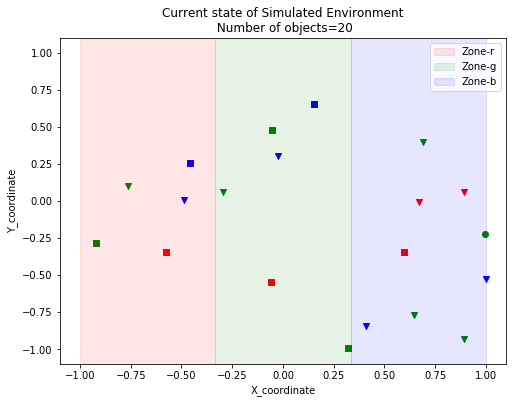

In [8]:
env=create_env()
env_copy_super=deepcopy(env)
fig,ax=plt.subplots(figsize=(8,6))
plot_env(env,ax,legend=True)

## Let's define the task as the combination of following subtasks:
* Pickup green and blue objects from the right bottom corner
* Move all red and blue triangles and circles from a particular area to a desired area
* Throw away all the squares from a target area

***The Sub-Tasks do not need to be completed in a specific order***

In [14]:
# For Pickup Subtask
target_area_p=[position(0.25,-1),position(1.0,-0.25)]
sub_task_p=task("pickup",["g","b"],np.nan,target_area_p,np.nan)

# For Move Subtask
target_area_m=[position(0.5,-0.75),position(1.0,0.45)]
destination_area_m=[position(-1,0.4),position(-0.7,1)]
sub_task_m=task("move",["r","b"],["triangle","circle"],target_area_m,destination_area_m)

# For Throw Subtask
target_area_t=[position(-1,-0.4),position(-0.25,0.3)]
sub_task_t=task("throw",np.nan,"square",target_area_t,np.nan)

In [15]:
#Create a dict of tasks
task_dict={"p":sub_task_p,"m":sub_task_m,"t":sub_task_t}
possible_orders=list(permutations(task_dict.keys())) #possible order of completing a task;

### Let us initialise a norm and also the robot

In [13]:
rule=expand("NORM");
print_rule(rule,1)

------------------------------------------------
                NORM Number=1
------------------------------------------------
    OBLIGATORY to
    TRASH R-SQUAREs
    if you PICKUP R-SQUAREs



## Important Terminology for Evaluating Likelihood of Expression
* Set **A** = {*Action plans to complete a task without any rules*}   
    Let |A| = n<sub>1</sub>  


* Set **B** = {*Action plans to complete a task with rules*}   
    Let |B| = m<sub>1</sub>


* Set **C** = {*Action Plan P : P is in B and TCI (P)>=threshold*}   
    where *TCI: A+B &rarr; [0,1]* is Task Completion Index or a measure of how well a Plan *P* completes a task  
    Let |C| = m
    
TCI (Task) = $\prod$<sub>i=1 to num_subtasks</sub> TCI (Sub-Task <sub>i</sub>)

### Generate Set A and find it's cardinality: n<sub>1</sub> 
By iterating over the possible orders of completing a task and combining the action plans of individual subtasks

In [16]:
order_plans={}
for order in possible_orders:
    env_copy=deepcopy(env)
    print ("\nThe chosen order is:",order)
    sub_task_plans={}
    for i,subtask_key in enumerate(order,1):
        print ("Subtask={}".format(i))
        task_dict[subtask_key].print_task()
        fig,ax=plt.subplots(1, 2, sharex=True, sharey=True,figsize=(14,10))
        plot_task(plt,env_copy,ax[0],"For:{}\nBefore the Sub-Task_{}".format(order,i),task_dict[subtask_key])
        sub_task_plans[i]=robot(task_dict[subtask_key],env_copy).make_permutations([],i,"A/{}_{}_{}".format(order[0],order[1],order[2]))
        plot_task(plt,env_copy,ax[1],"For:{}\nAfter the Sub-Task_{}".format(order,i),task_dict[subtask_key])
        plt.savefig("./permutations/A/{}_{}_{}/subtask_{}_effect.jpeg".format(order[0],order[1],order[2],i))
        plt.close()
    order_plans[order]=sub_task_plans
    
#Aggregate action plans for individual subtasks for each order
A={}
n1=0
for order in possible_orders:
    order_plan=order_plans[order]
    A[order]=aggregate("A/{}_{}_{}".format(order[0],order[1],order[2]),order_plan)
    n1+=A[order].shape[1]


The chosen order is: ('p', 'm', 't')
Subtask=1
---------------------------------
PICKUP
['g', 'b']
nan
---------------------------------
Found 5 actionable objects
120 Permutations possible for subtask=1
Creating directory to store permutations
-------------------------------------------
       Task Completion Index=1.00
-------------------------------------------
Subtask=2
---------------------------------
MOVE
['r', 'b']
['triangle', 'circle']
---------------------------------
Found 3 actionable objects
6 Permutations possible for subtask=2
Directory already available
-------------------------------------------
       Task Completion Index=1.00
-------------------------------------------
Subtask=3
---------------------------------
THROW
nan
square
---------------------------------
Found 3 actionable objects
6 Permutations possible for subtask=3
Directory already available
-------------------------------------------
       Task Completion Index=1.00
----------------------------------

Genrating Action profile for combination=79
Genrating Action profile for combination=80
Genrating Action profile for combination=81
Genrating Action profile for combination=82
Genrating Action profile for combination=83
Genrating Action profile for combination=84
Genrating Action profile for combination=85
Genrating Action profile for combination=86
Genrating Action profile for combination=87
Genrating Action profile for combination=88
Genrating Action profile for combination=89
Genrating Action profile for combination=90
Genrating Action profile for combination=91
Genrating Action profile for combination=92
Genrating Action profile for combination=93
Genrating Action profile for combination=94
Genrating Action profile for combination=95
Genrating Action profile for combination=96
Genrating Action profile for combination=97
Genrating Action profile for combination=98
Genrating Action profile for combination=99
Genrating Action profile for combination=100
Genrating Action profile for co

Genrating Action profile for combination=297
Genrating Action profile for combination=298
Genrating Action profile for combination=299
Genrating Action profile for combination=300
Genrating Action profile for combination=301
Genrating Action profile for combination=302
Genrating Action profile for combination=303
Genrating Action profile for combination=304
Genrating Action profile for combination=305
Genrating Action profile for combination=306
Genrating Action profile for combination=307
Genrating Action profile for combination=308
Genrating Action profile for combination=309
Genrating Action profile for combination=310
Genrating Action profile for combination=311
Genrating Action profile for combination=312
Genrating Action profile for combination=313
Genrating Action profile for combination=314
Genrating Action profile for combination=315
Genrating Action profile for combination=316
Genrating Action profile for combination=317
Genrating Action profile for combination=318
Genrating 

Genrating Action profile for combination=524
Genrating Action profile for combination=525
Genrating Action profile for combination=526
Genrating Action profile for combination=527
Genrating Action profile for combination=528
Genrating Action profile for combination=529
Genrating Action profile for combination=530
Genrating Action profile for combination=531
Genrating Action profile for combination=532
Genrating Action profile for combination=533
Genrating Action profile for combination=534
Genrating Action profile for combination=535
Genrating Action profile for combination=536
Genrating Action profile for combination=537
Genrating Action profile for combination=538
Genrating Action profile for combination=539
Genrating Action profile for combination=540
Genrating Action profile for combination=541
Genrating Action profile for combination=542
Genrating Action profile for combination=543
Genrating Action profile for combination=544
Genrating Action profile for combination=545
Genrating 

Genrating Action profile for combination=742
Genrating Action profile for combination=743
Genrating Action profile for combination=744
Genrating Action profile for combination=745
Genrating Action profile for combination=746
Genrating Action profile for combination=747
Genrating Action profile for combination=748
Genrating Action profile for combination=749
Genrating Action profile for combination=750
Genrating Action profile for combination=751
Genrating Action profile for combination=752
Genrating Action profile for combination=753
Genrating Action profile for combination=754
Genrating Action profile for combination=755
Genrating Action profile for combination=756
Genrating Action profile for combination=757
Genrating Action profile for combination=758
Genrating Action profile for combination=759
Genrating Action profile for combination=760
Genrating Action profile for combination=761
Genrating Action profile for combination=762
Genrating Action profile for combination=763
Genrating 

Genrating Action profile for combination=942
Genrating Action profile for combination=943
Genrating Action profile for combination=944
Genrating Action profile for combination=945
Genrating Action profile for combination=946
Genrating Action profile for combination=947
Genrating Action profile for combination=948
Genrating Action profile for combination=949
Genrating Action profile for combination=950
Genrating Action profile for combination=951
Genrating Action profile for combination=952
Genrating Action profile for combination=953
Genrating Action profile for combination=954
Genrating Action profile for combination=955
Genrating Action profile for combination=956
Genrating Action profile for combination=957
Genrating Action profile for combination=958
Genrating Action profile for combination=959
Genrating Action profile for combination=960
Genrating Action profile for combination=961
Genrating Action profile for combination=962
Genrating Action profile for combination=963
Genrating 

Genrating Action profile for combination=1155
Genrating Action profile for combination=1156
Genrating Action profile for combination=1157
Genrating Action profile for combination=1158
Genrating Action profile for combination=1159
Genrating Action profile for combination=1160
Genrating Action profile for combination=1161
Genrating Action profile for combination=1162
Genrating Action profile for combination=1163
Genrating Action profile for combination=1164
Genrating Action profile for combination=1165
Genrating Action profile for combination=1166
Genrating Action profile for combination=1167
Genrating Action profile for combination=1168
Genrating Action profile for combination=1169
Genrating Action profile for combination=1170
Genrating Action profile for combination=1171
Genrating Action profile for combination=1172
Genrating Action profile for combination=1173
Genrating Action profile for combination=1174
Genrating Action profile for combination=1175
Genrating Action profile for combi

Genrating Action profile for combination=1339
Genrating Action profile for combination=1340
Genrating Action profile for combination=1341
Genrating Action profile for combination=1342
Genrating Action profile for combination=1343
Genrating Action profile for combination=1344
Genrating Action profile for combination=1345
Genrating Action profile for combination=1346
Genrating Action profile for combination=1347
Genrating Action profile for combination=1348
Genrating Action profile for combination=1349
Genrating Action profile for combination=1350
Genrating Action profile for combination=1351
Genrating Action profile for combination=1352
Genrating Action profile for combination=1353
Genrating Action profile for combination=1354
Genrating Action profile for combination=1355
Genrating Action profile for combination=1356
Genrating Action profile for combination=1357
Genrating Action profile for combination=1358
Genrating Action profile for combination=1359
Genrating Action profile for combi

Genrating Action profile for combination=1542
Genrating Action profile for combination=1543
Genrating Action profile for combination=1544
Genrating Action profile for combination=1545
Genrating Action profile for combination=1546
Genrating Action profile for combination=1547
Genrating Action profile for combination=1548
Genrating Action profile for combination=1549
Genrating Action profile for combination=1550
Genrating Action profile for combination=1551
Genrating Action profile for combination=1552
Genrating Action profile for combination=1553
Genrating Action profile for combination=1554
Genrating Action profile for combination=1555
Genrating Action profile for combination=1556
Genrating Action profile for combination=1557
Genrating Action profile for combination=1558
Genrating Action profile for combination=1559
Genrating Action profile for combination=1560
Genrating Action profile for combination=1561
Genrating Action profile for combination=1562
Genrating Action profile for combi

Genrating Action profile for combination=1734
Genrating Action profile for combination=1735
Genrating Action profile for combination=1736
Genrating Action profile for combination=1737
Genrating Action profile for combination=1738
Genrating Action profile for combination=1739
Genrating Action profile for combination=1740
Genrating Action profile for combination=1741
Genrating Action profile for combination=1742
Genrating Action profile for combination=1743
Genrating Action profile for combination=1744
Genrating Action profile for combination=1745
Genrating Action profile for combination=1746
Genrating Action profile for combination=1747
Genrating Action profile for combination=1748
Genrating Action profile for combination=1749
Genrating Action profile for combination=1750
Genrating Action profile for combination=1751
Genrating Action profile for combination=1752
Genrating Action profile for combination=1753
Genrating Action profile for combination=1754
Genrating Action profile for combi

Genrating Action profile for combination=1952
Genrating Action profile for combination=1953
Genrating Action profile for combination=1954
Genrating Action profile for combination=1955
Genrating Action profile for combination=1956
Genrating Action profile for combination=1957
Genrating Action profile for combination=1958
Genrating Action profile for combination=1959
Genrating Action profile for combination=1960
Genrating Action profile for combination=1961
Genrating Action profile for combination=1962
Genrating Action profile for combination=1963
Genrating Action profile for combination=1964
Genrating Action profile for combination=1965
Genrating Action profile for combination=1966
Genrating Action profile for combination=1967
Genrating Action profile for combination=1968
Genrating Action profile for combination=1969
Genrating Action profile for combination=1970
Genrating Action profile for combination=1971
Genrating Action profile for combination=1972
Genrating Action profile for combi

Genrating Action profile for combination=2131
Genrating Action profile for combination=2132
Genrating Action profile for combination=2133
Genrating Action profile for combination=2134
Genrating Action profile for combination=2135
Genrating Action profile for combination=2136
Genrating Action profile for combination=2137
Genrating Action profile for combination=2138
Genrating Action profile for combination=2139
Genrating Action profile for combination=2140
Genrating Action profile for combination=2141
Genrating Action profile for combination=2142
Genrating Action profile for combination=2143
Genrating Action profile for combination=2144
Genrating Action profile for combination=2145
Genrating Action profile for combination=2146
Genrating Action profile for combination=2147
Genrating Action profile for combination=2148
Genrating Action profile for combination=2149
Genrating Action profile for combination=2150
Genrating Action profile for combination=2151
Genrating Action profile for combi

Genrating Action profile for combination=2325
Genrating Action profile for combination=2326
Genrating Action profile for combination=2327
Genrating Action profile for combination=2328
Genrating Action profile for combination=2329
Genrating Action profile for combination=2330
Genrating Action profile for combination=2331
Genrating Action profile for combination=2332
Genrating Action profile for combination=2333
Genrating Action profile for combination=2334
Genrating Action profile for combination=2335
Genrating Action profile for combination=2336
Genrating Action profile for combination=2337
Genrating Action profile for combination=2338
Genrating Action profile for combination=2339
Genrating Action profile for combination=2340
Genrating Action profile for combination=2341
Genrating Action profile for combination=2342
Genrating Action profile for combination=2343
Genrating Action profile for combination=2344
Genrating Action profile for combination=2345
Genrating Action profile for combi

Genrating Action profile for combination=2521
Genrating Action profile for combination=2522
Genrating Action profile for combination=2523
Genrating Action profile for combination=2524
Genrating Action profile for combination=2525
Genrating Action profile for combination=2526
Genrating Action profile for combination=2527
Genrating Action profile for combination=2528
Genrating Action profile for combination=2529
Genrating Action profile for combination=2530
Genrating Action profile for combination=2531
Genrating Action profile for combination=2532
Genrating Action profile for combination=2533
Genrating Action profile for combination=2534
Genrating Action profile for combination=2535
Genrating Action profile for combination=2536
Genrating Action profile for combination=2537
Genrating Action profile for combination=2538
Genrating Action profile for combination=2539
Genrating Action profile for combination=2540
Genrating Action profile for combination=2541
Genrating Action profile for combi

Genrating Action profile for combination=2701
Genrating Action profile for combination=2702
Genrating Action profile for combination=2703
Genrating Action profile for combination=2704
Genrating Action profile for combination=2705
Genrating Action profile for combination=2706
Genrating Action profile for combination=2707
Genrating Action profile for combination=2708
Genrating Action profile for combination=2709
Genrating Action profile for combination=2710
Genrating Action profile for combination=2711
Genrating Action profile for combination=2712
Genrating Action profile for combination=2713
Genrating Action profile for combination=2714
Genrating Action profile for combination=2715
Genrating Action profile for combination=2716
Genrating Action profile for combination=2717
Genrating Action profile for combination=2718
Genrating Action profile for combination=2719
Genrating Action profile for combination=2720
Genrating Action profile for combination=2721
Genrating Action profile for combi

Genrating Action profile for combination=2897
Genrating Action profile for combination=2898
Genrating Action profile for combination=2899
Genrating Action profile for combination=2900
Genrating Action profile for combination=2901
Genrating Action profile for combination=2902
Genrating Action profile for combination=2903
Genrating Action profile for combination=2904
Genrating Action profile for combination=2905
Genrating Action profile for combination=2906
Genrating Action profile for combination=2907
Genrating Action profile for combination=2908
Genrating Action profile for combination=2909
Genrating Action profile for combination=2910
Genrating Action profile for combination=2911
Genrating Action profile for combination=2912
Genrating Action profile for combination=2913
Genrating Action profile for combination=2914
Genrating Action profile for combination=2915
Genrating Action profile for combination=2916
Genrating Action profile for combination=2917
Genrating Action profile for combi

Genrating Action profile for combination=3098
Genrating Action profile for combination=3099
Genrating Action profile for combination=3100
Genrating Action profile for combination=3101
Genrating Action profile for combination=3102
Genrating Action profile for combination=3103
Genrating Action profile for combination=3104
Genrating Action profile for combination=3105
Genrating Action profile for combination=3106
Genrating Action profile for combination=3107
Genrating Action profile for combination=3108
Genrating Action profile for combination=3109
Genrating Action profile for combination=3110
Genrating Action profile for combination=3111
Genrating Action profile for combination=3112
Genrating Action profile for combination=3113
Genrating Action profile for combination=3114
Genrating Action profile for combination=3115
Genrating Action profile for combination=3116
Genrating Action profile for combination=3117
Genrating Action profile for combination=3118
Genrating Action profile for combi

Genrating Action profile for combination=3297
Genrating Action profile for combination=3298
Genrating Action profile for combination=3299
Genrating Action profile for combination=3300
Genrating Action profile for combination=3301
Genrating Action profile for combination=3302
Genrating Action profile for combination=3303
Genrating Action profile for combination=3304
Genrating Action profile for combination=3305
Genrating Action profile for combination=3306
Genrating Action profile for combination=3307
Genrating Action profile for combination=3308
Genrating Action profile for combination=3309
Genrating Action profile for combination=3310
Genrating Action profile for combination=3311
Genrating Action profile for combination=3312
Genrating Action profile for combination=3313
Genrating Action profile for combination=3314
Genrating Action profile for combination=3315
Genrating Action profile for combination=3316
Genrating Action profile for combination=3317
Genrating Action profile for combi

Genrating Action profile for combination=3494
Genrating Action profile for combination=3495
Genrating Action profile for combination=3496
Genrating Action profile for combination=3497
Genrating Action profile for combination=3498
Genrating Action profile for combination=3499
Genrating Action profile for combination=3500
Genrating Action profile for combination=3501
Genrating Action profile for combination=3502
Genrating Action profile for combination=3503
Genrating Action profile for combination=3504
Genrating Action profile for combination=3505
Genrating Action profile for combination=3506
Genrating Action profile for combination=3507
Genrating Action profile for combination=3508
Genrating Action profile for combination=3509
Genrating Action profile for combination=3510
Genrating Action profile for combination=3511
Genrating Action profile for combination=3512
Genrating Action profile for combination=3513
Genrating Action profile for combination=3514
Genrating Action profile for combi

Genrating Action profile for combination=3688
Genrating Action profile for combination=3689
Genrating Action profile for combination=3690
Genrating Action profile for combination=3691
Genrating Action profile for combination=3692
Genrating Action profile for combination=3693
Genrating Action profile for combination=3694
Genrating Action profile for combination=3695
Genrating Action profile for combination=3696
Genrating Action profile for combination=3697
Genrating Action profile for combination=3698
Genrating Action profile for combination=3699
Genrating Action profile for combination=3700
Genrating Action profile for combination=3701
Genrating Action profile for combination=3702
Genrating Action profile for combination=3703
Genrating Action profile for combination=3704
Genrating Action profile for combination=3705
Genrating Action profile for combination=3706
Genrating Action profile for combination=3707
Genrating Action profile for combination=3708
Genrating Action profile for combi

Genrating Action profile for combination=3877
Genrating Action profile for combination=3878
Genrating Action profile for combination=3879
Genrating Action profile for combination=3880
Genrating Action profile for combination=3881
Genrating Action profile for combination=3882
Genrating Action profile for combination=3883
Genrating Action profile for combination=3884
Genrating Action profile for combination=3885
Genrating Action profile for combination=3886
Genrating Action profile for combination=3887
Genrating Action profile for combination=3888
Genrating Action profile for combination=3889
Genrating Action profile for combination=3890
Genrating Action profile for combination=3891
Genrating Action profile for combination=3892
Genrating Action profile for combination=3893
Genrating Action profile for combination=3894
Genrating Action profile for combination=3895
Genrating Action profile for combination=3896
Genrating Action profile for combination=3897
Genrating Action profile for combi

Genrating Action profile for combination=4070
Genrating Action profile for combination=4071
Genrating Action profile for combination=4072
Genrating Action profile for combination=4073
Genrating Action profile for combination=4074
Genrating Action profile for combination=4075
Genrating Action profile for combination=4076
Genrating Action profile for combination=4077
Genrating Action profile for combination=4078
Genrating Action profile for combination=4079
Genrating Action profile for combination=4080
Genrating Action profile for combination=4081
Genrating Action profile for combination=4082
Genrating Action profile for combination=4083
Genrating Action profile for combination=4084
Genrating Action profile for combination=4085
Genrating Action profile for combination=4086
Genrating Action profile for combination=4087
Genrating Action profile for combination=4088
Genrating Action profile for combination=4089
Genrating Action profile for combination=4090
Genrating Action profile for combi

Genrating Action profile for combination=4283
Genrating Action profile for combination=4284
Genrating Action profile for combination=4285
Genrating Action profile for combination=4286
Genrating Action profile for combination=4287
Genrating Action profile for combination=4288
Genrating Action profile for combination=4289
Genrating Action profile for combination=4290
Genrating Action profile for combination=4291
Genrating Action profile for combination=4292
Genrating Action profile for combination=4293
Genrating Action profile for combination=4294
Genrating Action profile for combination=4295
Genrating Action profile for combination=4296
Genrating Action profile for combination=4297
Genrating Action profile for combination=4298
Genrating Action profile for combination=4299
Genrating Action profile for combination=4300
Genrating Action profile for combination=4301
Genrating Action profile for combination=4302
Genrating Action profile for combination=4303
Genrating Action profile for combi

Genrating Action profile for combination=163
Genrating Action profile for combination=164
Genrating Action profile for combination=165
Genrating Action profile for combination=166
Genrating Action profile for combination=167
Genrating Action profile for combination=168
Genrating Action profile for combination=169
Genrating Action profile for combination=170
Genrating Action profile for combination=171
Genrating Action profile for combination=172
Genrating Action profile for combination=173
Genrating Action profile for combination=174
Genrating Action profile for combination=175
Genrating Action profile for combination=176
Genrating Action profile for combination=177
Genrating Action profile for combination=178
Genrating Action profile for combination=179
Genrating Action profile for combination=180
Genrating Action profile for combination=181
Genrating Action profile for combination=182
Genrating Action profile for combination=183
Genrating Action profile for combination=184
Genrating 

Genrating Action profile for combination=355
Genrating Action profile for combination=356
Genrating Action profile for combination=357
Genrating Action profile for combination=358
Genrating Action profile for combination=359
Genrating Action profile for combination=360
Genrating Action profile for combination=361
Genrating Action profile for combination=362
Genrating Action profile for combination=363
Genrating Action profile for combination=364
Genrating Action profile for combination=365
Genrating Action profile for combination=366
Genrating Action profile for combination=367
Genrating Action profile for combination=368
Genrating Action profile for combination=369
Genrating Action profile for combination=370
Genrating Action profile for combination=371
Genrating Action profile for combination=372
Genrating Action profile for combination=373
Genrating Action profile for combination=374
Genrating Action profile for combination=375
Genrating Action profile for combination=376
Genrating 

Genrating Action profile for combination=556
Genrating Action profile for combination=557
Genrating Action profile for combination=558
Genrating Action profile for combination=559
Genrating Action profile for combination=560
Genrating Action profile for combination=561
Genrating Action profile for combination=562
Genrating Action profile for combination=563
Genrating Action profile for combination=564
Genrating Action profile for combination=565
Genrating Action profile for combination=566
Genrating Action profile for combination=567
Genrating Action profile for combination=568
Genrating Action profile for combination=569
Genrating Action profile for combination=570
Genrating Action profile for combination=571
Genrating Action profile for combination=572
Genrating Action profile for combination=573
Genrating Action profile for combination=574
Genrating Action profile for combination=575
Genrating Action profile for combination=576
Genrating Action profile for combination=577
Genrating 

Genrating Action profile for combination=744
Genrating Action profile for combination=745
Genrating Action profile for combination=746
Genrating Action profile for combination=747
Genrating Action profile for combination=748
Genrating Action profile for combination=749
Genrating Action profile for combination=750
Genrating Action profile for combination=751
Genrating Action profile for combination=752
Genrating Action profile for combination=753
Genrating Action profile for combination=754
Genrating Action profile for combination=755
Genrating Action profile for combination=756
Genrating Action profile for combination=757
Genrating Action profile for combination=758
Genrating Action profile for combination=759
Genrating Action profile for combination=760
Genrating Action profile for combination=761
Genrating Action profile for combination=762
Genrating Action profile for combination=763
Genrating Action profile for combination=764
Genrating Action profile for combination=765
Genrating 

Genrating Action profile for combination=932
Genrating Action profile for combination=933
Genrating Action profile for combination=934
Genrating Action profile for combination=935
Genrating Action profile for combination=936
Genrating Action profile for combination=937
Genrating Action profile for combination=938
Genrating Action profile for combination=939
Genrating Action profile for combination=940
Genrating Action profile for combination=941
Genrating Action profile for combination=942
Genrating Action profile for combination=943
Genrating Action profile for combination=944
Genrating Action profile for combination=945
Genrating Action profile for combination=946
Genrating Action profile for combination=947
Genrating Action profile for combination=948
Genrating Action profile for combination=949
Genrating Action profile for combination=950
Genrating Action profile for combination=951
Genrating Action profile for combination=952
Genrating Action profile for combination=953
Genrating 

Genrating Action profile for combination=1122
Genrating Action profile for combination=1123
Genrating Action profile for combination=1124
Genrating Action profile for combination=1125
Genrating Action profile for combination=1126
Genrating Action profile for combination=1127
Genrating Action profile for combination=1128
Genrating Action profile for combination=1129
Genrating Action profile for combination=1130
Genrating Action profile for combination=1131
Genrating Action profile for combination=1132
Genrating Action profile for combination=1133
Genrating Action profile for combination=1134
Genrating Action profile for combination=1135
Genrating Action profile for combination=1136
Genrating Action profile for combination=1137
Genrating Action profile for combination=1138
Genrating Action profile for combination=1139
Genrating Action profile for combination=1140
Genrating Action profile for combination=1141
Genrating Action profile for combination=1142
Genrating Action profile for combi

Genrating Action profile for combination=1309
Genrating Action profile for combination=1310
Genrating Action profile for combination=1311
Genrating Action profile for combination=1312
Genrating Action profile for combination=1313
Genrating Action profile for combination=1314
Genrating Action profile for combination=1315
Genrating Action profile for combination=1316
Genrating Action profile for combination=1317
Genrating Action profile for combination=1318
Genrating Action profile for combination=1319
Genrating Action profile for combination=1320
Genrating Action profile for combination=1321
Genrating Action profile for combination=1322
Genrating Action profile for combination=1323
Genrating Action profile for combination=1324
Genrating Action profile for combination=1325
Genrating Action profile for combination=1326
Genrating Action profile for combination=1327
Genrating Action profile for combination=1328
Genrating Action profile for combination=1329
Genrating Action profile for combi

Genrating Action profile for combination=1506
Genrating Action profile for combination=1507
Genrating Action profile for combination=1508
Genrating Action profile for combination=1509
Genrating Action profile for combination=1510
Genrating Action profile for combination=1511
Genrating Action profile for combination=1512
Genrating Action profile for combination=1513
Genrating Action profile for combination=1514
Genrating Action profile for combination=1515
Genrating Action profile for combination=1516
Genrating Action profile for combination=1517
Genrating Action profile for combination=1518
Genrating Action profile for combination=1519
Genrating Action profile for combination=1520
Genrating Action profile for combination=1521
Genrating Action profile for combination=1522
Genrating Action profile for combination=1523
Genrating Action profile for combination=1524
Genrating Action profile for combination=1525
Genrating Action profile for combination=1526
Genrating Action profile for combi

Genrating Action profile for combination=1717
Genrating Action profile for combination=1718
Genrating Action profile for combination=1719
Genrating Action profile for combination=1720
Genrating Action profile for combination=1721
Genrating Action profile for combination=1722
Genrating Action profile for combination=1723
Genrating Action profile for combination=1724
Genrating Action profile for combination=1725
Genrating Action profile for combination=1726
Genrating Action profile for combination=1727
Genrating Action profile for combination=1728
Genrating Action profile for combination=1729
Genrating Action profile for combination=1730
Genrating Action profile for combination=1731
Genrating Action profile for combination=1732
Genrating Action profile for combination=1733
Genrating Action profile for combination=1734
Genrating Action profile for combination=1735
Genrating Action profile for combination=1736
Genrating Action profile for combination=1737
Genrating Action profile for combi

Genrating Action profile for combination=1912
Genrating Action profile for combination=1913
Genrating Action profile for combination=1914
Genrating Action profile for combination=1915
Genrating Action profile for combination=1916
Genrating Action profile for combination=1917
Genrating Action profile for combination=1918
Genrating Action profile for combination=1919
Genrating Action profile for combination=1920
Genrating Action profile for combination=1921
Genrating Action profile for combination=1922
Genrating Action profile for combination=1923
Genrating Action profile for combination=1924
Genrating Action profile for combination=1925
Genrating Action profile for combination=1926
Genrating Action profile for combination=1927
Genrating Action profile for combination=1928
Genrating Action profile for combination=1929
Genrating Action profile for combination=1930
Genrating Action profile for combination=1931
Genrating Action profile for combination=1932
Genrating Action profile for combi

Genrating Action profile for combination=2117
Genrating Action profile for combination=2118
Genrating Action profile for combination=2119
Genrating Action profile for combination=2120
Genrating Action profile for combination=2121
Genrating Action profile for combination=2122
Genrating Action profile for combination=2123
Genrating Action profile for combination=2124
Genrating Action profile for combination=2125
Genrating Action profile for combination=2126
Genrating Action profile for combination=2127
Genrating Action profile for combination=2128
Genrating Action profile for combination=2129
Genrating Action profile for combination=2130
Genrating Action profile for combination=2131
Genrating Action profile for combination=2132
Genrating Action profile for combination=2133
Genrating Action profile for combination=2134
Genrating Action profile for combination=2135
Genrating Action profile for combination=2136
Genrating Action profile for combination=2137
Genrating Action profile for combi

Genrating Action profile for combination=2315
Genrating Action profile for combination=2316
Genrating Action profile for combination=2317
Genrating Action profile for combination=2318
Genrating Action profile for combination=2319
Genrating Action profile for combination=2320
Genrating Action profile for combination=2321
Genrating Action profile for combination=2322
Genrating Action profile for combination=2323
Genrating Action profile for combination=2324
Genrating Action profile for combination=2325
Genrating Action profile for combination=2326
Genrating Action profile for combination=2327
Genrating Action profile for combination=2328
Genrating Action profile for combination=2329
Genrating Action profile for combination=2330
Genrating Action profile for combination=2331
Genrating Action profile for combination=2332
Genrating Action profile for combination=2333
Genrating Action profile for combination=2334
Genrating Action profile for combination=2335
Genrating Action profile for combi

Genrating Action profile for combination=2540
Genrating Action profile for combination=2541
Genrating Action profile for combination=2542
Genrating Action profile for combination=2543
Genrating Action profile for combination=2544
Genrating Action profile for combination=2545
Genrating Action profile for combination=2546
Genrating Action profile for combination=2547
Genrating Action profile for combination=2548
Genrating Action profile for combination=2549
Genrating Action profile for combination=2550
Genrating Action profile for combination=2551
Genrating Action profile for combination=2552
Genrating Action profile for combination=2553
Genrating Action profile for combination=2554
Genrating Action profile for combination=2555
Genrating Action profile for combination=2556
Genrating Action profile for combination=2557
Genrating Action profile for combination=2558
Genrating Action profile for combination=2559
Genrating Action profile for combination=2560
Genrating Action profile for combi

Genrating Action profile for combination=2755
Genrating Action profile for combination=2756
Genrating Action profile for combination=2757
Genrating Action profile for combination=2758
Genrating Action profile for combination=2759
Genrating Action profile for combination=2760
Genrating Action profile for combination=2761
Genrating Action profile for combination=2762
Genrating Action profile for combination=2763
Genrating Action profile for combination=2764
Genrating Action profile for combination=2765
Genrating Action profile for combination=2766
Genrating Action profile for combination=2767
Genrating Action profile for combination=2768
Genrating Action profile for combination=2769
Genrating Action profile for combination=2770
Genrating Action profile for combination=2771
Genrating Action profile for combination=2772
Genrating Action profile for combination=2773
Genrating Action profile for combination=2774
Genrating Action profile for combination=2775
Genrating Action profile for combi

Genrating Action profile for combination=2975
Genrating Action profile for combination=2976
Genrating Action profile for combination=2977
Genrating Action profile for combination=2978
Genrating Action profile for combination=2979
Genrating Action profile for combination=2980
Genrating Action profile for combination=2981
Genrating Action profile for combination=2982
Genrating Action profile for combination=2983
Genrating Action profile for combination=2984
Genrating Action profile for combination=2985
Genrating Action profile for combination=2986
Genrating Action profile for combination=2987
Genrating Action profile for combination=2988
Genrating Action profile for combination=2989
Genrating Action profile for combination=2990
Genrating Action profile for combination=2991
Genrating Action profile for combination=2992
Genrating Action profile for combination=2993
Genrating Action profile for combination=2994
Genrating Action profile for combination=2995
Genrating Action profile for combi

Genrating Action profile for combination=3154
Genrating Action profile for combination=3155
Genrating Action profile for combination=3156
Genrating Action profile for combination=3157
Genrating Action profile for combination=3158
Genrating Action profile for combination=3159
Genrating Action profile for combination=3160
Genrating Action profile for combination=3161
Genrating Action profile for combination=3162
Genrating Action profile for combination=3163
Genrating Action profile for combination=3164
Genrating Action profile for combination=3165
Genrating Action profile for combination=3166
Genrating Action profile for combination=3167
Genrating Action profile for combination=3168
Genrating Action profile for combination=3169
Genrating Action profile for combination=3170
Genrating Action profile for combination=3171
Genrating Action profile for combination=3172
Genrating Action profile for combination=3173
Genrating Action profile for combination=3174
Genrating Action profile for combi

Genrating Action profile for combination=3348
Genrating Action profile for combination=3349
Genrating Action profile for combination=3350
Genrating Action profile for combination=3351
Genrating Action profile for combination=3352
Genrating Action profile for combination=3353
Genrating Action profile for combination=3354
Genrating Action profile for combination=3355
Genrating Action profile for combination=3356
Genrating Action profile for combination=3357
Genrating Action profile for combination=3358
Genrating Action profile for combination=3359
Genrating Action profile for combination=3360
Genrating Action profile for combination=3361
Genrating Action profile for combination=3362
Genrating Action profile for combination=3363
Genrating Action profile for combination=3364
Genrating Action profile for combination=3365
Genrating Action profile for combination=3366
Genrating Action profile for combination=3367
Genrating Action profile for combination=3368
Genrating Action profile for combi

Genrating Action profile for combination=3547
Genrating Action profile for combination=3548
Genrating Action profile for combination=3549
Genrating Action profile for combination=3550
Genrating Action profile for combination=3551
Genrating Action profile for combination=3552
Genrating Action profile for combination=3553
Genrating Action profile for combination=3554
Genrating Action profile for combination=3555
Genrating Action profile for combination=3556
Genrating Action profile for combination=3557
Genrating Action profile for combination=3558
Genrating Action profile for combination=3559
Genrating Action profile for combination=3560
Genrating Action profile for combination=3561
Genrating Action profile for combination=3562
Genrating Action profile for combination=3563
Genrating Action profile for combination=3564
Genrating Action profile for combination=3565
Genrating Action profile for combination=3566
Genrating Action profile for combination=3567
Genrating Action profile for combi

Genrating Action profile for combination=3755
Genrating Action profile for combination=3756
Genrating Action profile for combination=3757
Genrating Action profile for combination=3758
Genrating Action profile for combination=3759
Genrating Action profile for combination=3760
Genrating Action profile for combination=3761
Genrating Action profile for combination=3762
Genrating Action profile for combination=3763
Genrating Action profile for combination=3764
Genrating Action profile for combination=3765
Genrating Action profile for combination=3766
Genrating Action profile for combination=3767
Genrating Action profile for combination=3768
Genrating Action profile for combination=3769
Genrating Action profile for combination=3770
Genrating Action profile for combination=3771
Genrating Action profile for combination=3772
Genrating Action profile for combination=3773
Genrating Action profile for combination=3774
Genrating Action profile for combination=3775
Genrating Action profile for combi

Genrating Action profile for combination=3964
Genrating Action profile for combination=3965
Genrating Action profile for combination=3966
Genrating Action profile for combination=3967
Genrating Action profile for combination=3968
Genrating Action profile for combination=3969
Genrating Action profile for combination=3970
Genrating Action profile for combination=3971
Genrating Action profile for combination=3972
Genrating Action profile for combination=3973
Genrating Action profile for combination=3974
Genrating Action profile for combination=3975
Genrating Action profile for combination=3976
Genrating Action profile for combination=3977
Genrating Action profile for combination=3978
Genrating Action profile for combination=3979
Genrating Action profile for combination=3980
Genrating Action profile for combination=3981
Genrating Action profile for combination=3982
Genrating Action profile for combination=3983
Genrating Action profile for combination=3984
Genrating Action profile for combi

Genrating Action profile for combination=4169
Genrating Action profile for combination=4170
Genrating Action profile for combination=4171
Genrating Action profile for combination=4172
Genrating Action profile for combination=4173
Genrating Action profile for combination=4174
Genrating Action profile for combination=4175
Genrating Action profile for combination=4176
Genrating Action profile for combination=4177
Genrating Action profile for combination=4178
Genrating Action profile for combination=4179
Genrating Action profile for combination=4180
Genrating Action profile for combination=4181
Genrating Action profile for combination=4182
Genrating Action profile for combination=4183
Genrating Action profile for combination=4184
Genrating Action profile for combination=4185
Genrating Action profile for combination=4186
Genrating Action profile for combination=4187
Genrating Action profile for combination=4188
Genrating Action profile for combination=4189
Genrating Action profile for combi

Genrating Action profile for combination=37
Genrating Action profile for combination=38
Genrating Action profile for combination=39
Genrating Action profile for combination=40
Genrating Action profile for combination=41
Genrating Action profile for combination=42
Genrating Action profile for combination=43
Genrating Action profile for combination=44
Genrating Action profile for combination=45
Genrating Action profile for combination=46
Genrating Action profile for combination=47
Genrating Action profile for combination=48
Genrating Action profile for combination=49
Genrating Action profile for combination=50
Genrating Action profile for combination=51
Genrating Action profile for combination=52
Genrating Action profile for combination=53
Genrating Action profile for combination=54
Genrating Action profile for combination=55
Genrating Action profile for combination=56
Genrating Action profile for combination=57
Genrating Action profile for combination=58
Genrating Action profile for com

Genrating Action profile for combination=234
Genrating Action profile for combination=235
Genrating Action profile for combination=236
Genrating Action profile for combination=237
Genrating Action profile for combination=238
Genrating Action profile for combination=239
Genrating Action profile for combination=240
Genrating Action profile for combination=241
Genrating Action profile for combination=242
Genrating Action profile for combination=243
Genrating Action profile for combination=244
Genrating Action profile for combination=245
Genrating Action profile for combination=246
Genrating Action profile for combination=247
Genrating Action profile for combination=248
Genrating Action profile for combination=249
Genrating Action profile for combination=250
Genrating Action profile for combination=251
Genrating Action profile for combination=252
Genrating Action profile for combination=253
Genrating Action profile for combination=254
Genrating Action profile for combination=255
Genrating 

Genrating Action profile for combination=420
Genrating Action profile for combination=421
Genrating Action profile for combination=422
Genrating Action profile for combination=423
Genrating Action profile for combination=424
Genrating Action profile for combination=425
Genrating Action profile for combination=426
Genrating Action profile for combination=427
Genrating Action profile for combination=428
Genrating Action profile for combination=429
Genrating Action profile for combination=430
Genrating Action profile for combination=431
Genrating Action profile for combination=432
Genrating Action profile for combination=433
Genrating Action profile for combination=434
Genrating Action profile for combination=435
Genrating Action profile for combination=436
Genrating Action profile for combination=437
Genrating Action profile for combination=438
Genrating Action profile for combination=439
Genrating Action profile for combination=440
Genrating Action profile for combination=441
Genrating 

Genrating Action profile for combination=627
Genrating Action profile for combination=628
Genrating Action profile for combination=629
Genrating Action profile for combination=630
Genrating Action profile for combination=631
Genrating Action profile for combination=632
Genrating Action profile for combination=633
Genrating Action profile for combination=634
Genrating Action profile for combination=635
Genrating Action profile for combination=636
Genrating Action profile for combination=637
Genrating Action profile for combination=638
Genrating Action profile for combination=639
Genrating Action profile for combination=640
Genrating Action profile for combination=641
Genrating Action profile for combination=642
Genrating Action profile for combination=643
Genrating Action profile for combination=644
Genrating Action profile for combination=645
Genrating Action profile for combination=646
Genrating Action profile for combination=647
Genrating Action profile for combination=648
Genrating 

Genrating Action profile for combination=856
Genrating Action profile for combination=857
Genrating Action profile for combination=858
Genrating Action profile for combination=859
Genrating Action profile for combination=860
Genrating Action profile for combination=861
Genrating Action profile for combination=862
Genrating Action profile for combination=863
Genrating Action profile for combination=864
Creating directory to store Action plans
Total combinations possible=864
Genrating Action profile for combination=1
Genrating Action profile for combination=2
Genrating Action profile for combination=3
Genrating Action profile for combination=4
Genrating Action profile for combination=5
Genrating Action profile for combination=6
Genrating Action profile for combination=7
Genrating Action profile for combination=8
Genrating Action profile for combination=9
Genrating Action profile for combination=10
Genrating Action profile for combination=11
Genrating Action profile for combination=12
Gen

Genrating Action profile for combination=214
Genrating Action profile for combination=215
Genrating Action profile for combination=216
Genrating Action profile for combination=217
Genrating Action profile for combination=218
Genrating Action profile for combination=219
Genrating Action profile for combination=220
Genrating Action profile for combination=221
Genrating Action profile for combination=222
Genrating Action profile for combination=223
Genrating Action profile for combination=224
Genrating Action profile for combination=225
Genrating Action profile for combination=226
Genrating Action profile for combination=227
Genrating Action profile for combination=228
Genrating Action profile for combination=229
Genrating Action profile for combination=230
Genrating Action profile for combination=231
Genrating Action profile for combination=232
Genrating Action profile for combination=233
Genrating Action profile for combination=234
Genrating Action profile for combination=235
Genrating 

Genrating Action profile for combination=408
Genrating Action profile for combination=409
Genrating Action profile for combination=410
Genrating Action profile for combination=411
Genrating Action profile for combination=412
Genrating Action profile for combination=413
Genrating Action profile for combination=414
Genrating Action profile for combination=415
Genrating Action profile for combination=416
Genrating Action profile for combination=417
Genrating Action profile for combination=418
Genrating Action profile for combination=419
Genrating Action profile for combination=420
Genrating Action profile for combination=421
Genrating Action profile for combination=422
Genrating Action profile for combination=423
Genrating Action profile for combination=424
Genrating Action profile for combination=425
Genrating Action profile for combination=426
Genrating Action profile for combination=427
Genrating Action profile for combination=428
Genrating Action profile for combination=429
Genrating 

Genrating Action profile for combination=598
Genrating Action profile for combination=599
Genrating Action profile for combination=600
Genrating Action profile for combination=601
Genrating Action profile for combination=602
Genrating Action profile for combination=603
Genrating Action profile for combination=604
Genrating Action profile for combination=605
Genrating Action profile for combination=606
Genrating Action profile for combination=607
Genrating Action profile for combination=608
Genrating Action profile for combination=609
Genrating Action profile for combination=610
Genrating Action profile for combination=611
Genrating Action profile for combination=612
Genrating Action profile for combination=613
Genrating Action profile for combination=614
Genrating Action profile for combination=615
Genrating Action profile for combination=616
Genrating Action profile for combination=617
Genrating Action profile for combination=618
Genrating Action profile for combination=619
Genrating 

Genrating Action profile for combination=783
Genrating Action profile for combination=784
Genrating Action profile for combination=785
Genrating Action profile for combination=786
Genrating Action profile for combination=787
Genrating Action profile for combination=788
Genrating Action profile for combination=789
Genrating Action profile for combination=790
Genrating Action profile for combination=791
Genrating Action profile for combination=792
Genrating Action profile for combination=793
Genrating Action profile for combination=794
Genrating Action profile for combination=795
Genrating Action profile for combination=796
Genrating Action profile for combination=797
Genrating Action profile for combination=798
Genrating Action profile for combination=799
Genrating Action profile for combination=800
Genrating Action profile for combination=801
Genrating Action profile for combination=802
Genrating Action profile for combination=803
Genrating Action profile for combination=804
Genrating 

Genrating Action profile for combination=138
Genrating Action profile for combination=139
Genrating Action profile for combination=140
Genrating Action profile for combination=141
Genrating Action profile for combination=142
Genrating Action profile for combination=143
Genrating Action profile for combination=144
Genrating Action profile for combination=145
Genrating Action profile for combination=146
Genrating Action profile for combination=147
Genrating Action profile for combination=148
Genrating Action profile for combination=149
Genrating Action profile for combination=150
Genrating Action profile for combination=151
Genrating Action profile for combination=152
Genrating Action profile for combination=153
Genrating Action profile for combination=154
Genrating Action profile for combination=155
Genrating Action profile for combination=156
Genrating Action profile for combination=157
Genrating Action profile for combination=158
Genrating Action profile for combination=159
Genrating 

Genrating Action profile for combination=322
Genrating Action profile for combination=323
Genrating Action profile for combination=324
Genrating Action profile for combination=325
Genrating Action profile for combination=326
Genrating Action profile for combination=327
Genrating Action profile for combination=328
Genrating Action profile for combination=329
Genrating Action profile for combination=330
Genrating Action profile for combination=331
Genrating Action profile for combination=332
Genrating Action profile for combination=333
Genrating Action profile for combination=334
Genrating Action profile for combination=335
Genrating Action profile for combination=336
Genrating Action profile for combination=337
Genrating Action profile for combination=338
Genrating Action profile for combination=339
Genrating Action profile for combination=340
Genrating Action profile for combination=341
Genrating Action profile for combination=342
Genrating Action profile for combination=343
Genrating 

Genrating Action profile for combination=516
Genrating Action profile for combination=517
Genrating Action profile for combination=518
Genrating Action profile for combination=519
Genrating Action profile for combination=520
Genrating Action profile for combination=521
Genrating Action profile for combination=522
Genrating Action profile for combination=523
Genrating Action profile for combination=524
Genrating Action profile for combination=525
Genrating Action profile for combination=526
Genrating Action profile for combination=527
Genrating Action profile for combination=528
Genrating Action profile for combination=529
Genrating Action profile for combination=530
Genrating Action profile for combination=531
Genrating Action profile for combination=532
Genrating Action profile for combination=533
Genrating Action profile for combination=534
Genrating Action profile for combination=535
Genrating Action profile for combination=536
Genrating Action profile for combination=537
Genrating 

Genrating Action profile for combination=716
Genrating Action profile for combination=717
Genrating Action profile for combination=718
Genrating Action profile for combination=719
Genrating Action profile for combination=720
Genrating Action profile for combination=721
Genrating Action profile for combination=722
Genrating Action profile for combination=723
Genrating Action profile for combination=724
Genrating Action profile for combination=725
Genrating Action profile for combination=726
Genrating Action profile for combination=727
Genrating Action profile for combination=728
Genrating Action profile for combination=729
Genrating Action profile for combination=730
Genrating Action profile for combination=731
Genrating Action profile for combination=732
Genrating Action profile for combination=733
Genrating Action profile for combination=734
Genrating Action profile for combination=735
Genrating Action profile for combination=736
Genrating Action profile for combination=737
Genrating 

Genrating Action profile for combination=926
Genrating Action profile for combination=927
Genrating Action profile for combination=928
Genrating Action profile for combination=929
Genrating Action profile for combination=930
Genrating Action profile for combination=931
Genrating Action profile for combination=932
Genrating Action profile for combination=933
Genrating Action profile for combination=934
Genrating Action profile for combination=935
Genrating Action profile for combination=936
Genrating Action profile for combination=937
Genrating Action profile for combination=938
Genrating Action profile for combination=939
Genrating Action profile for combination=940
Genrating Action profile for combination=941
Genrating Action profile for combination=942
Genrating Action profile for combination=943
Genrating Action profile for combination=944
Genrating Action profile for combination=945
Genrating Action profile for combination=946
Genrating Action profile for combination=947
Genrating 

Genrating Action profile for combination=1131
Genrating Action profile for combination=1132
Genrating Action profile for combination=1133
Genrating Action profile for combination=1134
Genrating Action profile for combination=1135
Genrating Action profile for combination=1136
Genrating Action profile for combination=1137
Genrating Action profile for combination=1138
Genrating Action profile for combination=1139
Genrating Action profile for combination=1140
Genrating Action profile for combination=1141
Genrating Action profile for combination=1142
Genrating Action profile for combination=1143
Genrating Action profile for combination=1144
Genrating Action profile for combination=1145
Genrating Action profile for combination=1146
Genrating Action profile for combination=1147
Genrating Action profile for combination=1148
Genrating Action profile for combination=1149
Genrating Action profile for combination=1150
Genrating Action profile for combination=1151
Genrating Action profile for combi

Genrating Action profile for combination=1333
Genrating Action profile for combination=1334
Genrating Action profile for combination=1335
Genrating Action profile for combination=1336
Genrating Action profile for combination=1337
Genrating Action profile for combination=1338
Genrating Action profile for combination=1339
Genrating Action profile for combination=1340
Genrating Action profile for combination=1341
Genrating Action profile for combination=1342
Genrating Action profile for combination=1343
Genrating Action profile for combination=1344
Genrating Action profile for combination=1345
Genrating Action profile for combination=1346
Genrating Action profile for combination=1347
Genrating Action profile for combination=1348
Genrating Action profile for combination=1349
Genrating Action profile for combination=1350
Genrating Action profile for combination=1351
Genrating Action profile for combination=1352
Genrating Action profile for combination=1353
Genrating Action profile for combi

Genrating Action profile for combination=1530
Genrating Action profile for combination=1531
Genrating Action profile for combination=1532
Genrating Action profile for combination=1533
Genrating Action profile for combination=1534
Genrating Action profile for combination=1535
Genrating Action profile for combination=1536
Genrating Action profile for combination=1537
Genrating Action profile for combination=1538
Genrating Action profile for combination=1539
Genrating Action profile for combination=1540
Genrating Action profile for combination=1541
Genrating Action profile for combination=1542
Genrating Action profile for combination=1543
Genrating Action profile for combination=1544
Genrating Action profile for combination=1545
Genrating Action profile for combination=1546
Genrating Action profile for combination=1547
Genrating Action profile for combination=1548
Genrating Action profile for combination=1549
Genrating Action profile for combination=1550
Genrating Action profile for combi

Genrating Action profile for combination=1733
Genrating Action profile for combination=1734
Genrating Action profile for combination=1735
Genrating Action profile for combination=1736
Genrating Action profile for combination=1737
Genrating Action profile for combination=1738
Genrating Action profile for combination=1739
Genrating Action profile for combination=1740
Genrating Action profile for combination=1741
Genrating Action profile for combination=1742
Genrating Action profile for combination=1743
Genrating Action profile for combination=1744
Genrating Action profile for combination=1745
Genrating Action profile for combination=1746
Genrating Action profile for combination=1747
Genrating Action profile for combination=1748
Genrating Action profile for combination=1749
Genrating Action profile for combination=1750
Genrating Action profile for combination=1751
Genrating Action profile for combination=1752
Genrating Action profile for combination=1753
Genrating Action profile for combi

Genrating Action profile for combination=1951
Genrating Action profile for combination=1952
Genrating Action profile for combination=1953
Genrating Action profile for combination=1954
Genrating Action profile for combination=1955
Genrating Action profile for combination=1956
Genrating Action profile for combination=1957
Genrating Action profile for combination=1958
Genrating Action profile for combination=1959
Genrating Action profile for combination=1960
Genrating Action profile for combination=1961
Genrating Action profile for combination=1962
Genrating Action profile for combination=1963
Genrating Action profile for combination=1964
Genrating Action profile for combination=1965
Genrating Action profile for combination=1966
Genrating Action profile for combination=1967
Genrating Action profile for combination=1968
Genrating Action profile for combination=1969
Genrating Action profile for combination=1970
Genrating Action profile for combination=1971
Genrating Action profile for combi

Genrating Action profile for combination=2170
Genrating Action profile for combination=2171
Genrating Action profile for combination=2172
Genrating Action profile for combination=2173
Genrating Action profile for combination=2174
Genrating Action profile for combination=2175
Genrating Action profile for combination=2176
Genrating Action profile for combination=2177
Genrating Action profile for combination=2178
Genrating Action profile for combination=2179
Genrating Action profile for combination=2180
Genrating Action profile for combination=2181
Genrating Action profile for combination=2182
Genrating Action profile for combination=2183
Genrating Action profile for combination=2184
Genrating Action profile for combination=2185
Genrating Action profile for combination=2186
Genrating Action profile for combination=2187
Genrating Action profile for combination=2188
Genrating Action profile for combination=2189
Genrating Action profile for combination=2190
Genrating Action profile for combi

Genrating Action profile for combination=2352
Genrating Action profile for combination=2353
Genrating Action profile for combination=2354
Genrating Action profile for combination=2355
Genrating Action profile for combination=2356
Genrating Action profile for combination=2357
Genrating Action profile for combination=2358
Genrating Action profile for combination=2359
Genrating Action profile for combination=2360
Genrating Action profile for combination=2361
Genrating Action profile for combination=2362
Genrating Action profile for combination=2363
Genrating Action profile for combination=2364
Genrating Action profile for combination=2365
Genrating Action profile for combination=2366
Genrating Action profile for combination=2367
Genrating Action profile for combination=2368
Genrating Action profile for combination=2369
Genrating Action profile for combination=2370
Genrating Action profile for combination=2371
Genrating Action profile for combination=2372
Genrating Action profile for combi

Genrating Action profile for combination=2570
Genrating Action profile for combination=2571
Genrating Action profile for combination=2572
Genrating Action profile for combination=2573
Genrating Action profile for combination=2574
Genrating Action profile for combination=2575
Genrating Action profile for combination=2576
Genrating Action profile for combination=2577
Genrating Action profile for combination=2578
Genrating Action profile for combination=2579
Genrating Action profile for combination=2580
Genrating Action profile for combination=2581
Genrating Action profile for combination=2582
Genrating Action profile for combination=2583
Genrating Action profile for combination=2584
Genrating Action profile for combination=2585
Genrating Action profile for combination=2586
Genrating Action profile for combination=2587
Genrating Action profile for combination=2588
Genrating Action profile for combination=2589
Genrating Action profile for combination=2590
Genrating Action profile for combi

Genrating Action profile for combination=2789
Genrating Action profile for combination=2790
Genrating Action profile for combination=2791
Genrating Action profile for combination=2792
Genrating Action profile for combination=2793
Genrating Action profile for combination=2794
Genrating Action profile for combination=2795
Genrating Action profile for combination=2796
Genrating Action profile for combination=2797
Genrating Action profile for combination=2798
Genrating Action profile for combination=2799
Genrating Action profile for combination=2800
Genrating Action profile for combination=2801
Genrating Action profile for combination=2802
Genrating Action profile for combination=2803
Genrating Action profile for combination=2804
Genrating Action profile for combination=2805
Genrating Action profile for combination=2806
Genrating Action profile for combination=2807
Genrating Action profile for combination=2808
Genrating Action profile for combination=2809
Genrating Action profile for combi

Genrating Action profile for combination=2991
Genrating Action profile for combination=2992
Genrating Action profile for combination=2993
Genrating Action profile for combination=2994
Genrating Action profile for combination=2995
Genrating Action profile for combination=2996
Genrating Action profile for combination=2997
Genrating Action profile for combination=2998
Genrating Action profile for combination=2999
Genrating Action profile for combination=3000
Genrating Action profile for combination=3001
Genrating Action profile for combination=3002
Genrating Action profile for combination=3003
Genrating Action profile for combination=3004
Genrating Action profile for combination=3005
Genrating Action profile for combination=3006
Genrating Action profile for combination=3007
Genrating Action profile for combination=3008
Genrating Action profile for combination=3009
Genrating Action profile for combination=3010
Genrating Action profile for combination=3011
Genrating Action profile for combi

Genrating Action profile for combination=3208
Genrating Action profile for combination=3209
Genrating Action profile for combination=3210
Genrating Action profile for combination=3211
Genrating Action profile for combination=3212
Genrating Action profile for combination=3213
Genrating Action profile for combination=3214
Genrating Action profile for combination=3215
Genrating Action profile for combination=3216
Genrating Action profile for combination=3217
Genrating Action profile for combination=3218
Genrating Action profile for combination=3219
Genrating Action profile for combination=3220
Genrating Action profile for combination=3221
Genrating Action profile for combination=3222
Genrating Action profile for combination=3223
Genrating Action profile for combination=3224
Genrating Action profile for combination=3225
Genrating Action profile for combination=3226
Genrating Action profile for combination=3227
Genrating Action profile for combination=3228
Genrating Action profile for combi

Genrating Action profile for combination=3389
Genrating Action profile for combination=3390
Genrating Action profile for combination=3391
Genrating Action profile for combination=3392
Genrating Action profile for combination=3393
Genrating Action profile for combination=3394
Genrating Action profile for combination=3395
Genrating Action profile for combination=3396
Genrating Action profile for combination=3397
Genrating Action profile for combination=3398
Genrating Action profile for combination=3399
Genrating Action profile for combination=3400
Genrating Action profile for combination=3401
Genrating Action profile for combination=3402
Genrating Action profile for combination=3403
Genrating Action profile for combination=3404
Genrating Action profile for combination=3405
Genrating Action profile for combination=3406
Genrating Action profile for combination=3407
Genrating Action profile for combination=3408
Genrating Action profile for combination=3409
Genrating Action profile for combi

Genrating Action profile for combination=3596
Genrating Action profile for combination=3597
Genrating Action profile for combination=3598
Genrating Action profile for combination=3599
Genrating Action profile for combination=3600
Genrating Action profile for combination=3601
Genrating Action profile for combination=3602
Genrating Action profile for combination=3603
Genrating Action profile for combination=3604
Genrating Action profile for combination=3605
Genrating Action profile for combination=3606
Genrating Action profile for combination=3607
Genrating Action profile for combination=3608
Genrating Action profile for combination=3609
Genrating Action profile for combination=3610
Genrating Action profile for combination=3611
Genrating Action profile for combination=3612
Genrating Action profile for combination=3613
Genrating Action profile for combination=3614
Genrating Action profile for combination=3615
Genrating Action profile for combination=3616
Genrating Action profile for combi

Genrating Action profile for combination=3779
Genrating Action profile for combination=3780
Genrating Action profile for combination=3781
Genrating Action profile for combination=3782
Genrating Action profile for combination=3783
Genrating Action profile for combination=3784
Genrating Action profile for combination=3785
Genrating Action profile for combination=3786
Genrating Action profile for combination=3787
Genrating Action profile for combination=3788
Genrating Action profile for combination=3789
Genrating Action profile for combination=3790
Genrating Action profile for combination=3791
Genrating Action profile for combination=3792
Genrating Action profile for combination=3793
Genrating Action profile for combination=3794
Genrating Action profile for combination=3795
Genrating Action profile for combination=3796
Genrating Action profile for combination=3797
Genrating Action profile for combination=3798
Genrating Action profile for combination=3799
Genrating Action profile for combi

Genrating Action profile for combination=3959
Genrating Action profile for combination=3960
Genrating Action profile for combination=3961
Genrating Action profile for combination=3962
Genrating Action profile for combination=3963
Genrating Action profile for combination=3964
Genrating Action profile for combination=3965
Genrating Action profile for combination=3966
Genrating Action profile for combination=3967
Genrating Action profile for combination=3968
Genrating Action profile for combination=3969
Genrating Action profile for combination=3970
Genrating Action profile for combination=3971
Genrating Action profile for combination=3972
Genrating Action profile for combination=3973
Genrating Action profile for combination=3974
Genrating Action profile for combination=3975
Genrating Action profile for combination=3976
Genrating Action profile for combination=3977
Genrating Action profile for combination=3978
Genrating Action profile for combination=3979
Genrating Action profile for combi

Genrating Action profile for combination=4170
Genrating Action profile for combination=4171
Genrating Action profile for combination=4172
Genrating Action profile for combination=4173
Genrating Action profile for combination=4174
Genrating Action profile for combination=4175
Genrating Action profile for combination=4176
Genrating Action profile for combination=4177
Genrating Action profile for combination=4178
Genrating Action profile for combination=4179
Genrating Action profile for combination=4180
Genrating Action profile for combination=4181
Genrating Action profile for combination=4182
Genrating Action profile for combination=4183
Genrating Action profile for combination=4184
Genrating Action profile for combination=4185
Genrating Action profile for combination=4186
Genrating Action profile for combination=4187
Genrating Action profile for combination=4188
Genrating Action profile for combination=4189
Genrating Action profile for combination=4190
Genrating Action profile for combi

Genrating Action profile for combination=43
Genrating Action profile for combination=44
Genrating Action profile for combination=45
Genrating Action profile for combination=46
Genrating Action profile for combination=47
Genrating Action profile for combination=48
Genrating Action profile for combination=49
Genrating Action profile for combination=50
Genrating Action profile for combination=51
Genrating Action profile for combination=52
Genrating Action profile for combination=53
Genrating Action profile for combination=54
Genrating Action profile for combination=55
Genrating Action profile for combination=56
Genrating Action profile for combination=57
Genrating Action profile for combination=58
Genrating Action profile for combination=59
Genrating Action profile for combination=60
Genrating Action profile for combination=61
Genrating Action profile for combination=62
Genrating Action profile for combination=63
Genrating Action profile for combination=64
Genrating Action profile for com

Genrating Action profile for combination=255
Genrating Action profile for combination=256
Genrating Action profile for combination=257
Genrating Action profile for combination=258
Genrating Action profile for combination=259
Genrating Action profile for combination=260
Genrating Action profile for combination=261
Genrating Action profile for combination=262
Genrating Action profile for combination=263
Genrating Action profile for combination=264
Genrating Action profile for combination=265
Genrating Action profile for combination=266
Genrating Action profile for combination=267
Genrating Action profile for combination=268
Genrating Action profile for combination=269
Genrating Action profile for combination=270
Genrating Action profile for combination=271
Genrating Action profile for combination=272
Genrating Action profile for combination=273
Genrating Action profile for combination=274
Genrating Action profile for combination=275
Genrating Action profile for combination=276
Genrating 

Genrating Action profile for combination=439
Genrating Action profile for combination=440
Genrating Action profile for combination=441
Genrating Action profile for combination=442
Genrating Action profile for combination=443
Genrating Action profile for combination=444
Genrating Action profile for combination=445
Genrating Action profile for combination=446
Genrating Action profile for combination=447
Genrating Action profile for combination=448
Genrating Action profile for combination=449
Genrating Action profile for combination=450
Genrating Action profile for combination=451
Genrating Action profile for combination=452
Genrating Action profile for combination=453
Genrating Action profile for combination=454
Genrating Action profile for combination=455
Genrating Action profile for combination=456
Genrating Action profile for combination=457
Genrating Action profile for combination=458
Genrating Action profile for combination=459
Genrating Action profile for combination=460
Genrating 

Genrating Action profile for combination=625
Genrating Action profile for combination=626
Genrating Action profile for combination=627
Genrating Action profile for combination=628
Genrating Action profile for combination=629
Genrating Action profile for combination=630
Genrating Action profile for combination=631
Genrating Action profile for combination=632
Genrating Action profile for combination=633
Genrating Action profile for combination=634
Genrating Action profile for combination=635
Genrating Action profile for combination=636
Genrating Action profile for combination=637
Genrating Action profile for combination=638
Genrating Action profile for combination=639
Genrating Action profile for combination=640
Genrating Action profile for combination=641
Genrating Action profile for combination=642
Genrating Action profile for combination=643
Genrating Action profile for combination=644
Genrating Action profile for combination=645
Genrating Action profile for combination=646
Genrating 

Genrating Action profile for combination=819
Genrating Action profile for combination=820
Genrating Action profile for combination=821
Genrating Action profile for combination=822
Genrating Action profile for combination=823
Genrating Action profile for combination=824
Genrating Action profile for combination=825
Genrating Action profile for combination=826
Genrating Action profile for combination=827
Genrating Action profile for combination=828
Genrating Action profile for combination=829
Genrating Action profile for combination=830
Genrating Action profile for combination=831
Genrating Action profile for combination=832
Genrating Action profile for combination=833
Genrating Action profile for combination=834
Genrating Action profile for combination=835
Genrating Action profile for combination=836
Genrating Action profile for combination=837
Genrating Action profile for combination=838
Genrating Action profile for combination=839
Genrating Action profile for combination=840
Genrating 

### Generate Set B and find it's cardinality: m<sub>1</sub> 
By iterating over the possible orders of completing a task (with norm) and combining the action plans of individual subtasks

In [17]:
order_plans={}
for order in possible_orders:
    env_copy=deepcopy(env)
    print ("\nThe chosen order is:",order)
    sub_task_plans={}
    for i,subtask_key in enumerate(order,1):
        print ("Subtask={}".format(i))
        task_dict[subtask_key].print_task()
        fig,ax=plt.subplots(1, 2, sharex=True, sharey=True,figsize=(14,10))
        plot_task(plt,env_copy,ax[0],"For:{}\nBefore the Sub-Task_{}".format(order,i),task_dict[subtask_key])
        sub_task_plans[i]=robot(task_dict[subtask_key],env_copy).make_permutations([rule],i,"B/{}_{}_{}".format(order[0],order[1],order[2]))
        plot_task(plt,env_copy,ax[1],"For:{}\nAfter the Sub-Task_{}".format(order,i),task_dict[subtask_key])
        plt.savefig("./permutations/B/{}_{}_{}/subtask_{}_effect.jpeg".format(order[0],order[1],order[2],i))
        plt.close()
    order_plans[order]=sub_task_plans
    
#Aggregate action plans for individual subtasks for each order
B={}
m1=0
for order in possible_orders:
    order_plan=order_plans[order]
    B[order]=aggregate("B/{}_{}_{}".format(order[0],order[1],order[2]),order_plan)
    m1+=B[order].shape[1]


The chosen order is: ('p', 'm', 't')
Subtask=1
---------------------------------
PICKUP
['g', 'b']
['square', 'circle', 'triangle']
---------------------------------
Found 5 actionable objects
120 Permutations possible for subtask=1
Creating directory to store permutations
-------------------------------------------
       Task Completion Index=1.00
-------------------------------------------
Subtask=2
---------------------------------
MOVE
['r', 'b']
['triangle', 'circle']
---------------------------------
Found 3 actionable objects
6 Permutations possible for subtask=2
Directory already available
-------------------------------------------
       Task Completion Index=1.00
-------------------------------------------
Subtask=3
---------------------------------
THROW
['r', 'g', 'b']
['square']
---------------------------------
Found 3 actionable objects
6 Permutations possible for subtask=3
Directory already available
-------------------------------------------
       Task Completion 

Genrating Action profile for combination=62
Genrating Action profile for combination=63
Genrating Action profile for combination=64
Genrating Action profile for combination=65
Genrating Action profile for combination=66
Genrating Action profile for combination=67
Genrating Action profile for combination=68
Genrating Action profile for combination=69
Genrating Action profile for combination=70
Genrating Action profile for combination=71
Genrating Action profile for combination=72
Genrating Action profile for combination=73
Genrating Action profile for combination=74
Genrating Action profile for combination=75
Genrating Action profile for combination=76
Genrating Action profile for combination=77
Genrating Action profile for combination=78
Genrating Action profile for combination=79
Genrating Action profile for combination=80
Genrating Action profile for combination=81
Genrating Action profile for combination=82
Genrating Action profile for combination=83
Genrating Action profile for com

Genrating Action profile for combination=298
Genrating Action profile for combination=299
Genrating Action profile for combination=300
Genrating Action profile for combination=301
Genrating Action profile for combination=302
Genrating Action profile for combination=303
Genrating Action profile for combination=304
Genrating Action profile for combination=305
Genrating Action profile for combination=306
Genrating Action profile for combination=307
Genrating Action profile for combination=308
Genrating Action profile for combination=309
Genrating Action profile for combination=310
Genrating Action profile for combination=311
Genrating Action profile for combination=312
Genrating Action profile for combination=313
Genrating Action profile for combination=314
Genrating Action profile for combination=315
Genrating Action profile for combination=316
Genrating Action profile for combination=317
Genrating Action profile for combination=318
Genrating Action profile for combination=319
Genrating 

Genrating Action profile for combination=509
Genrating Action profile for combination=510
Genrating Action profile for combination=511
Genrating Action profile for combination=512
Genrating Action profile for combination=513
Genrating Action profile for combination=514
Genrating Action profile for combination=515
Genrating Action profile for combination=516
Genrating Action profile for combination=517
Genrating Action profile for combination=518
Genrating Action profile for combination=519
Genrating Action profile for combination=520
Genrating Action profile for combination=521
Genrating Action profile for combination=522
Genrating Action profile for combination=523
Genrating Action profile for combination=524
Genrating Action profile for combination=525
Genrating Action profile for combination=526
Genrating Action profile for combination=527
Genrating Action profile for combination=528
Genrating Action profile for combination=529
Genrating Action profile for combination=530
Genrating 

Genrating Action profile for combination=694
Genrating Action profile for combination=695
Genrating Action profile for combination=696
Genrating Action profile for combination=697
Genrating Action profile for combination=698
Genrating Action profile for combination=699
Genrating Action profile for combination=700
Genrating Action profile for combination=701
Genrating Action profile for combination=702
Genrating Action profile for combination=703
Genrating Action profile for combination=704
Genrating Action profile for combination=705
Genrating Action profile for combination=706
Genrating Action profile for combination=707
Genrating Action profile for combination=708
Genrating Action profile for combination=709
Genrating Action profile for combination=710
Genrating Action profile for combination=711
Genrating Action profile for combination=712
Genrating Action profile for combination=713
Genrating Action profile for combination=714
Genrating Action profile for combination=715
Genrating 

Genrating Action profile for combination=890
Genrating Action profile for combination=891
Genrating Action profile for combination=892
Genrating Action profile for combination=893
Genrating Action profile for combination=894
Genrating Action profile for combination=895
Genrating Action profile for combination=896
Genrating Action profile for combination=897
Genrating Action profile for combination=898
Genrating Action profile for combination=899
Genrating Action profile for combination=900
Genrating Action profile for combination=901
Genrating Action profile for combination=902
Genrating Action profile for combination=903
Genrating Action profile for combination=904
Genrating Action profile for combination=905
Genrating Action profile for combination=906
Genrating Action profile for combination=907
Genrating Action profile for combination=908
Genrating Action profile for combination=909
Genrating Action profile for combination=910
Genrating Action profile for combination=911
Genrating 

Genrating Action profile for combination=1105
Genrating Action profile for combination=1106
Genrating Action profile for combination=1107
Genrating Action profile for combination=1108
Genrating Action profile for combination=1109
Genrating Action profile for combination=1110
Genrating Action profile for combination=1111
Genrating Action profile for combination=1112
Genrating Action profile for combination=1113
Genrating Action profile for combination=1114
Genrating Action profile for combination=1115
Genrating Action profile for combination=1116
Genrating Action profile for combination=1117
Genrating Action profile for combination=1118
Genrating Action profile for combination=1119
Genrating Action profile for combination=1120
Genrating Action profile for combination=1121
Genrating Action profile for combination=1122
Genrating Action profile for combination=1123
Genrating Action profile for combination=1124
Genrating Action profile for combination=1125
Genrating Action profile for combi

Genrating Action profile for combination=1316
Genrating Action profile for combination=1317
Genrating Action profile for combination=1318
Genrating Action profile for combination=1319
Genrating Action profile for combination=1320
Genrating Action profile for combination=1321
Genrating Action profile for combination=1322
Genrating Action profile for combination=1323
Genrating Action profile for combination=1324
Genrating Action profile for combination=1325
Genrating Action profile for combination=1326
Genrating Action profile for combination=1327
Genrating Action profile for combination=1328
Genrating Action profile for combination=1329
Genrating Action profile for combination=1330
Genrating Action profile for combination=1331
Genrating Action profile for combination=1332
Genrating Action profile for combination=1333
Genrating Action profile for combination=1334
Genrating Action profile for combination=1335
Genrating Action profile for combination=1336
Genrating Action profile for combi

Genrating Action profile for combination=1528
Genrating Action profile for combination=1529
Genrating Action profile for combination=1530
Genrating Action profile for combination=1531
Genrating Action profile for combination=1532
Genrating Action profile for combination=1533
Genrating Action profile for combination=1534
Genrating Action profile for combination=1535
Genrating Action profile for combination=1536
Genrating Action profile for combination=1537
Genrating Action profile for combination=1538
Genrating Action profile for combination=1539
Genrating Action profile for combination=1540
Genrating Action profile for combination=1541
Genrating Action profile for combination=1542
Genrating Action profile for combination=1543
Genrating Action profile for combination=1544
Genrating Action profile for combination=1545
Genrating Action profile for combination=1546
Genrating Action profile for combination=1547
Genrating Action profile for combination=1548
Genrating Action profile for combi

Genrating Action profile for combination=1707
Genrating Action profile for combination=1708
Genrating Action profile for combination=1709
Genrating Action profile for combination=1710
Genrating Action profile for combination=1711
Genrating Action profile for combination=1712
Genrating Action profile for combination=1713
Genrating Action profile for combination=1714
Genrating Action profile for combination=1715
Genrating Action profile for combination=1716
Genrating Action profile for combination=1717
Genrating Action profile for combination=1718
Genrating Action profile for combination=1719
Genrating Action profile for combination=1720
Genrating Action profile for combination=1721
Genrating Action profile for combination=1722
Genrating Action profile for combination=1723
Genrating Action profile for combination=1724
Genrating Action profile for combination=1725
Genrating Action profile for combination=1726
Genrating Action profile for combination=1727
Genrating Action profile for combi

Genrating Action profile for combination=1918
Genrating Action profile for combination=1919
Genrating Action profile for combination=1920
Genrating Action profile for combination=1921
Genrating Action profile for combination=1922
Genrating Action profile for combination=1923
Genrating Action profile for combination=1924
Genrating Action profile for combination=1925
Genrating Action profile for combination=1926
Genrating Action profile for combination=1927
Genrating Action profile for combination=1928
Genrating Action profile for combination=1929
Genrating Action profile for combination=1930
Genrating Action profile for combination=1931
Genrating Action profile for combination=1932
Genrating Action profile for combination=1933
Genrating Action profile for combination=1934
Genrating Action profile for combination=1935
Genrating Action profile for combination=1936
Genrating Action profile for combination=1937
Genrating Action profile for combination=1938
Genrating Action profile for combi

Genrating Action profile for combination=2108
Genrating Action profile for combination=2109
Genrating Action profile for combination=2110
Genrating Action profile for combination=2111
Genrating Action profile for combination=2112
Genrating Action profile for combination=2113
Genrating Action profile for combination=2114
Genrating Action profile for combination=2115
Genrating Action profile for combination=2116
Genrating Action profile for combination=2117
Genrating Action profile for combination=2118
Genrating Action profile for combination=2119
Genrating Action profile for combination=2120
Genrating Action profile for combination=2121
Genrating Action profile for combination=2122
Genrating Action profile for combination=2123
Genrating Action profile for combination=2124
Genrating Action profile for combination=2125
Genrating Action profile for combination=2126
Genrating Action profile for combination=2127
Genrating Action profile for combination=2128
Genrating Action profile for combi

Genrating Action profile for combination=2295
Genrating Action profile for combination=2296
Genrating Action profile for combination=2297
Genrating Action profile for combination=2298
Genrating Action profile for combination=2299
Genrating Action profile for combination=2300
Genrating Action profile for combination=2301
Genrating Action profile for combination=2302
Genrating Action profile for combination=2303
Genrating Action profile for combination=2304
Genrating Action profile for combination=2305
Genrating Action profile for combination=2306
Genrating Action profile for combination=2307
Genrating Action profile for combination=2308
Genrating Action profile for combination=2309
Genrating Action profile for combination=2310
Genrating Action profile for combination=2311
Genrating Action profile for combination=2312
Genrating Action profile for combination=2313
Genrating Action profile for combination=2314
Genrating Action profile for combination=2315
Genrating Action profile for combi

Genrating Action profile for combination=2484
Genrating Action profile for combination=2485
Genrating Action profile for combination=2486
Genrating Action profile for combination=2487
Genrating Action profile for combination=2488
Genrating Action profile for combination=2489
Genrating Action profile for combination=2490
Genrating Action profile for combination=2491
Genrating Action profile for combination=2492
Genrating Action profile for combination=2493
Genrating Action profile for combination=2494
Genrating Action profile for combination=2495
Genrating Action profile for combination=2496
Genrating Action profile for combination=2497
Genrating Action profile for combination=2498
Genrating Action profile for combination=2499
Genrating Action profile for combination=2500
Genrating Action profile for combination=2501
Genrating Action profile for combination=2502
Genrating Action profile for combination=2503
Genrating Action profile for combination=2504
Genrating Action profile for combi

Genrating Action profile for combination=2676
Genrating Action profile for combination=2677
Genrating Action profile for combination=2678
Genrating Action profile for combination=2679
Genrating Action profile for combination=2680
Genrating Action profile for combination=2681
Genrating Action profile for combination=2682
Genrating Action profile for combination=2683
Genrating Action profile for combination=2684
Genrating Action profile for combination=2685
Genrating Action profile for combination=2686
Genrating Action profile for combination=2687
Genrating Action profile for combination=2688
Genrating Action profile for combination=2689
Genrating Action profile for combination=2690
Genrating Action profile for combination=2691
Genrating Action profile for combination=2692
Genrating Action profile for combination=2693
Genrating Action profile for combination=2694
Genrating Action profile for combination=2695
Genrating Action profile for combination=2696
Genrating Action profile for combi

Genrating Action profile for combination=2861
Genrating Action profile for combination=2862
Genrating Action profile for combination=2863
Genrating Action profile for combination=2864
Genrating Action profile for combination=2865
Genrating Action profile for combination=2866
Genrating Action profile for combination=2867
Genrating Action profile for combination=2868
Genrating Action profile for combination=2869
Genrating Action profile for combination=2870
Genrating Action profile for combination=2871
Genrating Action profile for combination=2872
Genrating Action profile for combination=2873
Genrating Action profile for combination=2874
Genrating Action profile for combination=2875
Genrating Action profile for combination=2876
Genrating Action profile for combination=2877
Genrating Action profile for combination=2878
Genrating Action profile for combination=2879
Genrating Action profile for combination=2880
Genrating Action profile for combination=2881
Genrating Action profile for combi

Genrating Action profile for combination=3042
Genrating Action profile for combination=3043
Genrating Action profile for combination=3044
Genrating Action profile for combination=3045
Genrating Action profile for combination=3046
Genrating Action profile for combination=3047
Genrating Action profile for combination=3048
Genrating Action profile for combination=3049
Genrating Action profile for combination=3050
Genrating Action profile for combination=3051
Genrating Action profile for combination=3052
Genrating Action profile for combination=3053
Genrating Action profile for combination=3054
Genrating Action profile for combination=3055
Genrating Action profile for combination=3056
Genrating Action profile for combination=3057
Genrating Action profile for combination=3058
Genrating Action profile for combination=3059
Genrating Action profile for combination=3060
Genrating Action profile for combination=3061
Genrating Action profile for combination=3062
Genrating Action profile for combi

Genrating Action profile for combination=3249
Genrating Action profile for combination=3250
Genrating Action profile for combination=3251
Genrating Action profile for combination=3252
Genrating Action profile for combination=3253
Genrating Action profile for combination=3254
Genrating Action profile for combination=3255
Genrating Action profile for combination=3256
Genrating Action profile for combination=3257
Genrating Action profile for combination=3258
Genrating Action profile for combination=3259
Genrating Action profile for combination=3260
Genrating Action profile for combination=3261
Genrating Action profile for combination=3262
Genrating Action profile for combination=3263
Genrating Action profile for combination=3264
Genrating Action profile for combination=3265
Genrating Action profile for combination=3266
Genrating Action profile for combination=3267
Genrating Action profile for combination=3268
Genrating Action profile for combination=3269
Genrating Action profile for combi

Genrating Action profile for combination=3445
Genrating Action profile for combination=3446
Genrating Action profile for combination=3447
Genrating Action profile for combination=3448
Genrating Action profile for combination=3449
Genrating Action profile for combination=3450
Genrating Action profile for combination=3451
Genrating Action profile for combination=3452
Genrating Action profile for combination=3453
Genrating Action profile for combination=3454
Genrating Action profile for combination=3455
Genrating Action profile for combination=3456
Genrating Action profile for combination=3457
Genrating Action profile for combination=3458
Genrating Action profile for combination=3459
Genrating Action profile for combination=3460
Genrating Action profile for combination=3461
Genrating Action profile for combination=3462
Genrating Action profile for combination=3463
Genrating Action profile for combination=3464
Genrating Action profile for combination=3465
Genrating Action profile for combi

Genrating Action profile for combination=3624
Genrating Action profile for combination=3625
Genrating Action profile for combination=3626
Genrating Action profile for combination=3627
Genrating Action profile for combination=3628
Genrating Action profile for combination=3629
Genrating Action profile for combination=3630
Genrating Action profile for combination=3631
Genrating Action profile for combination=3632
Genrating Action profile for combination=3633
Genrating Action profile for combination=3634
Genrating Action profile for combination=3635
Genrating Action profile for combination=3636
Genrating Action profile for combination=3637
Genrating Action profile for combination=3638
Genrating Action profile for combination=3639
Genrating Action profile for combination=3640
Genrating Action profile for combination=3641
Genrating Action profile for combination=3642
Genrating Action profile for combination=3643
Genrating Action profile for combination=3644
Genrating Action profile for combi

Genrating Action profile for combination=3802
Genrating Action profile for combination=3803
Genrating Action profile for combination=3804
Genrating Action profile for combination=3805
Genrating Action profile for combination=3806
Genrating Action profile for combination=3807
Genrating Action profile for combination=3808
Genrating Action profile for combination=3809
Genrating Action profile for combination=3810
Genrating Action profile for combination=3811
Genrating Action profile for combination=3812
Genrating Action profile for combination=3813
Genrating Action profile for combination=3814
Genrating Action profile for combination=3815
Genrating Action profile for combination=3816
Genrating Action profile for combination=3817
Genrating Action profile for combination=3818
Genrating Action profile for combination=3819
Genrating Action profile for combination=3820
Genrating Action profile for combination=3821
Genrating Action profile for combination=3822
Genrating Action profile for combi

Genrating Action profile for combination=3997
Genrating Action profile for combination=3998
Genrating Action profile for combination=3999
Genrating Action profile for combination=4000
Genrating Action profile for combination=4001
Genrating Action profile for combination=4002
Genrating Action profile for combination=4003
Genrating Action profile for combination=4004
Genrating Action profile for combination=4005
Genrating Action profile for combination=4006
Genrating Action profile for combination=4007
Genrating Action profile for combination=4008
Genrating Action profile for combination=4009
Genrating Action profile for combination=4010
Genrating Action profile for combination=4011
Genrating Action profile for combination=4012
Genrating Action profile for combination=4013
Genrating Action profile for combination=4014
Genrating Action profile for combination=4015
Genrating Action profile for combination=4016
Genrating Action profile for combination=4017
Genrating Action profile for combi

Genrating Action profile for combination=4188
Genrating Action profile for combination=4189
Genrating Action profile for combination=4190
Genrating Action profile for combination=4191
Genrating Action profile for combination=4192
Genrating Action profile for combination=4193
Genrating Action profile for combination=4194
Genrating Action profile for combination=4195
Genrating Action profile for combination=4196
Genrating Action profile for combination=4197
Genrating Action profile for combination=4198
Genrating Action profile for combination=4199
Genrating Action profile for combination=4200
Genrating Action profile for combination=4201
Genrating Action profile for combination=4202
Genrating Action profile for combination=4203
Genrating Action profile for combination=4204
Genrating Action profile for combination=4205
Genrating Action profile for combination=4206
Genrating Action profile for combination=4207
Genrating Action profile for combination=4208
Genrating Action profile for combi

Genrating Action profile for combination=56
Genrating Action profile for combination=57
Genrating Action profile for combination=58
Genrating Action profile for combination=59
Genrating Action profile for combination=60
Genrating Action profile for combination=61
Genrating Action profile for combination=62
Genrating Action profile for combination=63
Genrating Action profile for combination=64
Genrating Action profile for combination=65
Genrating Action profile for combination=66
Genrating Action profile for combination=67
Genrating Action profile for combination=68
Genrating Action profile for combination=69
Genrating Action profile for combination=70
Genrating Action profile for combination=71
Genrating Action profile for combination=72
Genrating Action profile for combination=73
Genrating Action profile for combination=74
Genrating Action profile for combination=75
Genrating Action profile for combination=76
Genrating Action profile for combination=77
Genrating Action profile for com

Genrating Action profile for combination=290
Genrating Action profile for combination=291
Genrating Action profile for combination=292
Genrating Action profile for combination=293
Genrating Action profile for combination=294
Genrating Action profile for combination=295
Genrating Action profile for combination=296
Genrating Action profile for combination=297
Genrating Action profile for combination=298
Genrating Action profile for combination=299
Genrating Action profile for combination=300
Genrating Action profile for combination=301
Genrating Action profile for combination=302
Genrating Action profile for combination=303
Genrating Action profile for combination=304
Genrating Action profile for combination=305
Genrating Action profile for combination=306
Genrating Action profile for combination=307
Genrating Action profile for combination=308
Genrating Action profile for combination=309
Genrating Action profile for combination=310
Genrating Action profile for combination=311
Genrating 

Genrating Action profile for combination=515
Genrating Action profile for combination=516
Genrating Action profile for combination=517
Genrating Action profile for combination=518
Genrating Action profile for combination=519
Genrating Action profile for combination=520
Genrating Action profile for combination=521
Genrating Action profile for combination=522
Genrating Action profile for combination=523
Genrating Action profile for combination=524
Genrating Action profile for combination=525
Genrating Action profile for combination=526
Genrating Action profile for combination=527
Genrating Action profile for combination=528
Genrating Action profile for combination=529
Genrating Action profile for combination=530
Genrating Action profile for combination=531
Genrating Action profile for combination=532
Genrating Action profile for combination=533
Genrating Action profile for combination=534
Genrating Action profile for combination=535
Genrating Action profile for combination=536
Genrating 

Genrating Action profile for combination=702
Genrating Action profile for combination=703
Genrating Action profile for combination=704
Genrating Action profile for combination=705
Genrating Action profile for combination=706
Genrating Action profile for combination=707
Genrating Action profile for combination=708
Genrating Action profile for combination=709
Genrating Action profile for combination=710
Genrating Action profile for combination=711
Genrating Action profile for combination=712
Genrating Action profile for combination=713
Genrating Action profile for combination=714
Genrating Action profile for combination=715
Genrating Action profile for combination=716
Genrating Action profile for combination=717
Genrating Action profile for combination=718
Genrating Action profile for combination=719
Genrating Action profile for combination=720
Genrating Action profile for combination=721
Genrating Action profile for combination=722
Genrating Action profile for combination=723
Genrating 

Genrating Action profile for combination=885
Genrating Action profile for combination=886
Genrating Action profile for combination=887
Genrating Action profile for combination=888
Genrating Action profile for combination=889
Genrating Action profile for combination=890
Genrating Action profile for combination=891
Genrating Action profile for combination=892
Genrating Action profile for combination=893
Genrating Action profile for combination=894
Genrating Action profile for combination=895
Genrating Action profile for combination=896
Genrating Action profile for combination=897
Genrating Action profile for combination=898
Genrating Action profile for combination=899
Genrating Action profile for combination=900
Genrating Action profile for combination=901
Genrating Action profile for combination=902
Genrating Action profile for combination=903
Genrating Action profile for combination=904
Genrating Action profile for combination=905
Genrating Action profile for combination=906
Genrating 

Genrating Action profile for combination=1107
Genrating Action profile for combination=1108
Genrating Action profile for combination=1109
Genrating Action profile for combination=1110
Genrating Action profile for combination=1111
Genrating Action profile for combination=1112
Genrating Action profile for combination=1113
Genrating Action profile for combination=1114
Genrating Action profile for combination=1115
Genrating Action profile for combination=1116
Genrating Action profile for combination=1117
Genrating Action profile for combination=1118
Genrating Action profile for combination=1119
Genrating Action profile for combination=1120
Genrating Action profile for combination=1121
Genrating Action profile for combination=1122
Genrating Action profile for combination=1123
Genrating Action profile for combination=1124
Genrating Action profile for combination=1125
Genrating Action profile for combination=1126
Genrating Action profile for combination=1127
Genrating Action profile for combi

Genrating Action profile for combination=1291
Genrating Action profile for combination=1292
Genrating Action profile for combination=1293
Genrating Action profile for combination=1294
Genrating Action profile for combination=1295
Genrating Action profile for combination=1296
Genrating Action profile for combination=1297
Genrating Action profile for combination=1298
Genrating Action profile for combination=1299
Genrating Action profile for combination=1300
Genrating Action profile for combination=1301
Genrating Action profile for combination=1302
Genrating Action profile for combination=1303
Genrating Action profile for combination=1304
Genrating Action profile for combination=1305
Genrating Action profile for combination=1306
Genrating Action profile for combination=1307
Genrating Action profile for combination=1308
Genrating Action profile for combination=1309
Genrating Action profile for combination=1310
Genrating Action profile for combination=1311
Genrating Action profile for combi

Genrating Action profile for combination=1475
Genrating Action profile for combination=1476
Genrating Action profile for combination=1477
Genrating Action profile for combination=1478
Genrating Action profile for combination=1479
Genrating Action profile for combination=1480
Genrating Action profile for combination=1481
Genrating Action profile for combination=1482
Genrating Action profile for combination=1483
Genrating Action profile for combination=1484
Genrating Action profile for combination=1485
Genrating Action profile for combination=1486
Genrating Action profile for combination=1487
Genrating Action profile for combination=1488
Genrating Action profile for combination=1489
Genrating Action profile for combination=1490
Genrating Action profile for combination=1491
Genrating Action profile for combination=1492
Genrating Action profile for combination=1493
Genrating Action profile for combination=1494
Genrating Action profile for combination=1495
Genrating Action profile for combi

Genrating Action profile for combination=1656
Genrating Action profile for combination=1657
Genrating Action profile for combination=1658
Genrating Action profile for combination=1659
Genrating Action profile for combination=1660
Genrating Action profile for combination=1661
Genrating Action profile for combination=1662
Genrating Action profile for combination=1663
Genrating Action profile for combination=1664
Genrating Action profile for combination=1665
Genrating Action profile for combination=1666
Genrating Action profile for combination=1667
Genrating Action profile for combination=1668
Genrating Action profile for combination=1669
Genrating Action profile for combination=1670
Genrating Action profile for combination=1671
Genrating Action profile for combination=1672
Genrating Action profile for combination=1673
Genrating Action profile for combination=1674
Genrating Action profile for combination=1675
Genrating Action profile for combination=1676
Genrating Action profile for combi

Genrating Action profile for combination=1844
Genrating Action profile for combination=1845
Genrating Action profile for combination=1846
Genrating Action profile for combination=1847
Genrating Action profile for combination=1848
Genrating Action profile for combination=1849
Genrating Action profile for combination=1850
Genrating Action profile for combination=1851
Genrating Action profile for combination=1852
Genrating Action profile for combination=1853
Genrating Action profile for combination=1854
Genrating Action profile for combination=1855
Genrating Action profile for combination=1856
Genrating Action profile for combination=1857
Genrating Action profile for combination=1858
Genrating Action profile for combination=1859
Genrating Action profile for combination=1860
Genrating Action profile for combination=1861
Genrating Action profile for combination=1862
Genrating Action profile for combination=1863
Genrating Action profile for combination=1864
Genrating Action profile for combi

Genrating Action profile for combination=2027
Genrating Action profile for combination=2028
Genrating Action profile for combination=2029
Genrating Action profile for combination=2030
Genrating Action profile for combination=2031
Genrating Action profile for combination=2032
Genrating Action profile for combination=2033
Genrating Action profile for combination=2034
Genrating Action profile for combination=2035
Genrating Action profile for combination=2036
Genrating Action profile for combination=2037
Genrating Action profile for combination=2038
Genrating Action profile for combination=2039
Genrating Action profile for combination=2040
Genrating Action profile for combination=2041
Genrating Action profile for combination=2042
Genrating Action profile for combination=2043
Genrating Action profile for combination=2044
Genrating Action profile for combination=2045
Genrating Action profile for combination=2046
Genrating Action profile for combination=2047
Genrating Action profile for combi

Genrating Action profile for combination=2250
Genrating Action profile for combination=2251
Genrating Action profile for combination=2252
Genrating Action profile for combination=2253
Genrating Action profile for combination=2254
Genrating Action profile for combination=2255
Genrating Action profile for combination=2256
Genrating Action profile for combination=2257
Genrating Action profile for combination=2258
Genrating Action profile for combination=2259
Genrating Action profile for combination=2260
Genrating Action profile for combination=2261
Genrating Action profile for combination=2262
Genrating Action profile for combination=2263
Genrating Action profile for combination=2264
Genrating Action profile for combination=2265
Genrating Action profile for combination=2266
Genrating Action profile for combination=2267
Genrating Action profile for combination=2268
Genrating Action profile for combination=2269
Genrating Action profile for combination=2270
Genrating Action profile for combi

Genrating Action profile for combination=2457
Genrating Action profile for combination=2458
Genrating Action profile for combination=2459
Genrating Action profile for combination=2460
Genrating Action profile for combination=2461
Genrating Action profile for combination=2462
Genrating Action profile for combination=2463
Genrating Action profile for combination=2464
Genrating Action profile for combination=2465
Genrating Action profile for combination=2466
Genrating Action profile for combination=2467
Genrating Action profile for combination=2468
Genrating Action profile for combination=2469
Genrating Action profile for combination=2470
Genrating Action profile for combination=2471
Genrating Action profile for combination=2472
Genrating Action profile for combination=2473
Genrating Action profile for combination=2474
Genrating Action profile for combination=2475
Genrating Action profile for combination=2476
Genrating Action profile for combination=2477
Genrating Action profile for combi

Genrating Action profile for combination=2650
Genrating Action profile for combination=2651
Genrating Action profile for combination=2652
Genrating Action profile for combination=2653
Genrating Action profile for combination=2654
Genrating Action profile for combination=2655
Genrating Action profile for combination=2656
Genrating Action profile for combination=2657
Genrating Action profile for combination=2658
Genrating Action profile for combination=2659
Genrating Action profile for combination=2660
Genrating Action profile for combination=2661
Genrating Action profile for combination=2662
Genrating Action profile for combination=2663
Genrating Action profile for combination=2664
Genrating Action profile for combination=2665
Genrating Action profile for combination=2666
Genrating Action profile for combination=2667
Genrating Action profile for combination=2668
Genrating Action profile for combination=2669
Genrating Action profile for combination=2670
Genrating Action profile for combi

Genrating Action profile for combination=2852
Genrating Action profile for combination=2853
Genrating Action profile for combination=2854
Genrating Action profile for combination=2855
Genrating Action profile for combination=2856
Genrating Action profile for combination=2857
Genrating Action profile for combination=2858
Genrating Action profile for combination=2859
Genrating Action profile for combination=2860
Genrating Action profile for combination=2861
Genrating Action profile for combination=2862
Genrating Action profile for combination=2863
Genrating Action profile for combination=2864
Genrating Action profile for combination=2865
Genrating Action profile for combination=2866
Genrating Action profile for combination=2867
Genrating Action profile for combination=2868
Genrating Action profile for combination=2869
Genrating Action profile for combination=2870
Genrating Action profile for combination=2871
Genrating Action profile for combination=2872
Genrating Action profile for combi

Genrating Action profile for combination=3073
Genrating Action profile for combination=3074
Genrating Action profile for combination=3075
Genrating Action profile for combination=3076
Genrating Action profile for combination=3077
Genrating Action profile for combination=3078
Genrating Action profile for combination=3079
Genrating Action profile for combination=3080
Genrating Action profile for combination=3081
Genrating Action profile for combination=3082
Genrating Action profile for combination=3083
Genrating Action profile for combination=3084
Genrating Action profile for combination=3085
Genrating Action profile for combination=3086
Genrating Action profile for combination=3087
Genrating Action profile for combination=3088
Genrating Action profile for combination=3089
Genrating Action profile for combination=3090
Genrating Action profile for combination=3091
Genrating Action profile for combination=3092
Genrating Action profile for combination=3093
Genrating Action profile for combi

Genrating Action profile for combination=3271
Genrating Action profile for combination=3272
Genrating Action profile for combination=3273
Genrating Action profile for combination=3274
Genrating Action profile for combination=3275
Genrating Action profile for combination=3276
Genrating Action profile for combination=3277
Genrating Action profile for combination=3278
Genrating Action profile for combination=3279
Genrating Action profile for combination=3280
Genrating Action profile for combination=3281
Genrating Action profile for combination=3282
Genrating Action profile for combination=3283
Genrating Action profile for combination=3284
Genrating Action profile for combination=3285
Genrating Action profile for combination=3286
Genrating Action profile for combination=3287
Genrating Action profile for combination=3288
Genrating Action profile for combination=3289
Genrating Action profile for combination=3290
Genrating Action profile for combination=3291
Genrating Action profile for combi

Genrating Action profile for combination=3464
Genrating Action profile for combination=3465
Genrating Action profile for combination=3466
Genrating Action profile for combination=3467
Genrating Action profile for combination=3468
Genrating Action profile for combination=3469
Genrating Action profile for combination=3470
Genrating Action profile for combination=3471
Genrating Action profile for combination=3472
Genrating Action profile for combination=3473
Genrating Action profile for combination=3474
Genrating Action profile for combination=3475
Genrating Action profile for combination=3476
Genrating Action profile for combination=3477
Genrating Action profile for combination=3478
Genrating Action profile for combination=3479
Genrating Action profile for combination=3480
Genrating Action profile for combination=3481
Genrating Action profile for combination=3482
Genrating Action profile for combination=3483
Genrating Action profile for combination=3484
Genrating Action profile for combi

Genrating Action profile for combination=3675
Genrating Action profile for combination=3676
Genrating Action profile for combination=3677
Genrating Action profile for combination=3678
Genrating Action profile for combination=3679
Genrating Action profile for combination=3680
Genrating Action profile for combination=3681
Genrating Action profile for combination=3682
Genrating Action profile for combination=3683
Genrating Action profile for combination=3684
Genrating Action profile for combination=3685
Genrating Action profile for combination=3686
Genrating Action profile for combination=3687
Genrating Action profile for combination=3688
Genrating Action profile for combination=3689
Genrating Action profile for combination=3690
Genrating Action profile for combination=3691
Genrating Action profile for combination=3692
Genrating Action profile for combination=3693
Genrating Action profile for combination=3694
Genrating Action profile for combination=3695
Genrating Action profile for combi

Genrating Action profile for combination=3889
Genrating Action profile for combination=3890
Genrating Action profile for combination=3891
Genrating Action profile for combination=3892
Genrating Action profile for combination=3893
Genrating Action profile for combination=3894
Genrating Action profile for combination=3895
Genrating Action profile for combination=3896
Genrating Action profile for combination=3897
Genrating Action profile for combination=3898
Genrating Action profile for combination=3899
Genrating Action profile for combination=3900
Genrating Action profile for combination=3901
Genrating Action profile for combination=3902
Genrating Action profile for combination=3903
Genrating Action profile for combination=3904
Genrating Action profile for combination=3905
Genrating Action profile for combination=3906
Genrating Action profile for combination=3907
Genrating Action profile for combination=3908
Genrating Action profile for combination=3909
Genrating Action profile for combi

Genrating Action profile for combination=4080
Genrating Action profile for combination=4081
Genrating Action profile for combination=4082
Genrating Action profile for combination=4083
Genrating Action profile for combination=4084
Genrating Action profile for combination=4085
Genrating Action profile for combination=4086
Genrating Action profile for combination=4087
Genrating Action profile for combination=4088
Genrating Action profile for combination=4089
Genrating Action profile for combination=4090
Genrating Action profile for combination=4091
Genrating Action profile for combination=4092
Genrating Action profile for combination=4093
Genrating Action profile for combination=4094
Genrating Action profile for combination=4095
Genrating Action profile for combination=4096
Genrating Action profile for combination=4097
Genrating Action profile for combination=4098
Genrating Action profile for combination=4099
Genrating Action profile for combination=4100
Genrating Action profile for combi

Genrating Action profile for combination=4264
Genrating Action profile for combination=4265
Genrating Action profile for combination=4266
Genrating Action profile for combination=4267
Genrating Action profile for combination=4268
Genrating Action profile for combination=4269
Genrating Action profile for combination=4270
Genrating Action profile for combination=4271
Genrating Action profile for combination=4272
Genrating Action profile for combination=4273
Genrating Action profile for combination=4274
Genrating Action profile for combination=4275
Genrating Action profile for combination=4276
Genrating Action profile for combination=4277
Genrating Action profile for combination=4278
Genrating Action profile for combination=4279
Genrating Action profile for combination=4280
Genrating Action profile for combination=4281
Genrating Action profile for combination=4282
Genrating Action profile for combination=4283
Genrating Action profile for combination=4284
Genrating Action profile for combi

Genrating Action profile for combination=144
Genrating Action profile for combination=145
Genrating Action profile for combination=146
Genrating Action profile for combination=147
Genrating Action profile for combination=148
Genrating Action profile for combination=149
Genrating Action profile for combination=150
Genrating Action profile for combination=151
Genrating Action profile for combination=152
Genrating Action profile for combination=153
Genrating Action profile for combination=154
Genrating Action profile for combination=155
Genrating Action profile for combination=156
Genrating Action profile for combination=157
Genrating Action profile for combination=158
Genrating Action profile for combination=159
Genrating Action profile for combination=160
Genrating Action profile for combination=161
Genrating Action profile for combination=162
Genrating Action profile for combination=163
Genrating Action profile for combination=164
Genrating Action profile for combination=165
Genrating 

Genrating Action profile for combination=333
Genrating Action profile for combination=334
Genrating Action profile for combination=335
Genrating Action profile for combination=336
Genrating Action profile for combination=337
Genrating Action profile for combination=338
Genrating Action profile for combination=339
Genrating Action profile for combination=340
Genrating Action profile for combination=341
Genrating Action profile for combination=342
Genrating Action profile for combination=343
Genrating Action profile for combination=344
Genrating Action profile for combination=345
Genrating Action profile for combination=346
Genrating Action profile for combination=347
Genrating Action profile for combination=348
Genrating Action profile for combination=349
Genrating Action profile for combination=350
Genrating Action profile for combination=351
Genrating Action profile for combination=352
Genrating Action profile for combination=353
Genrating Action profile for combination=354
Genrating 

Genrating Action profile for combination=531
Genrating Action profile for combination=532
Genrating Action profile for combination=533
Genrating Action profile for combination=534
Genrating Action profile for combination=535
Genrating Action profile for combination=536
Genrating Action profile for combination=537
Genrating Action profile for combination=538
Genrating Action profile for combination=539
Genrating Action profile for combination=540
Genrating Action profile for combination=541
Genrating Action profile for combination=542
Genrating Action profile for combination=543
Genrating Action profile for combination=544
Genrating Action profile for combination=545
Genrating Action profile for combination=546
Genrating Action profile for combination=547
Genrating Action profile for combination=548
Genrating Action profile for combination=549
Genrating Action profile for combination=550
Genrating Action profile for combination=551
Genrating Action profile for combination=552
Genrating 

Genrating Action profile for combination=749
Genrating Action profile for combination=750
Genrating Action profile for combination=751
Genrating Action profile for combination=752
Genrating Action profile for combination=753
Genrating Action profile for combination=754
Genrating Action profile for combination=755
Genrating Action profile for combination=756
Genrating Action profile for combination=757
Genrating Action profile for combination=758
Genrating Action profile for combination=759
Genrating Action profile for combination=760
Genrating Action profile for combination=761
Genrating Action profile for combination=762
Genrating Action profile for combination=763
Genrating Action profile for combination=764
Genrating Action profile for combination=765
Genrating Action profile for combination=766
Genrating Action profile for combination=767
Genrating Action profile for combination=768
Genrating Action profile for combination=769
Genrating Action profile for combination=770
Genrating 

Genrating Action profile for combination=97
Genrating Action profile for combination=98
Genrating Action profile for combination=99
Genrating Action profile for combination=100
Genrating Action profile for combination=101
Genrating Action profile for combination=102
Genrating Action profile for combination=103
Genrating Action profile for combination=104
Genrating Action profile for combination=105
Genrating Action profile for combination=106
Genrating Action profile for combination=107
Genrating Action profile for combination=108
Genrating Action profile for combination=109
Genrating Action profile for combination=110
Genrating Action profile for combination=111
Genrating Action profile for combination=112
Genrating Action profile for combination=113
Genrating Action profile for combination=114
Genrating Action profile for combination=115
Genrating Action profile for combination=116
Genrating Action profile for combination=117
Genrating Action profile for combination=118
Genrating Act

Genrating Action profile for combination=307
Genrating Action profile for combination=308
Genrating Action profile for combination=309
Genrating Action profile for combination=310
Genrating Action profile for combination=311
Genrating Action profile for combination=312
Genrating Action profile for combination=313
Genrating Action profile for combination=314
Genrating Action profile for combination=315
Genrating Action profile for combination=316
Genrating Action profile for combination=317
Genrating Action profile for combination=318
Genrating Action profile for combination=319
Genrating Action profile for combination=320
Genrating Action profile for combination=321
Genrating Action profile for combination=322
Genrating Action profile for combination=323
Genrating Action profile for combination=324
Genrating Action profile for combination=325
Genrating Action profile for combination=326
Genrating Action profile for combination=327
Genrating Action profile for combination=328
Genrating 

Genrating Action profile for combination=502
Genrating Action profile for combination=503
Genrating Action profile for combination=504
Genrating Action profile for combination=505
Genrating Action profile for combination=506
Genrating Action profile for combination=507
Genrating Action profile for combination=508
Genrating Action profile for combination=509
Genrating Action profile for combination=510
Genrating Action profile for combination=511
Genrating Action profile for combination=512
Genrating Action profile for combination=513
Genrating Action profile for combination=514
Genrating Action profile for combination=515
Genrating Action profile for combination=516
Genrating Action profile for combination=517
Genrating Action profile for combination=518
Genrating Action profile for combination=519
Genrating Action profile for combination=520
Genrating Action profile for combination=521
Genrating Action profile for combination=522
Genrating Action profile for combination=523
Genrating 

Genrating Action profile for combination=728
Genrating Action profile for combination=729
Genrating Action profile for combination=730
Genrating Action profile for combination=731
Genrating Action profile for combination=732
Genrating Action profile for combination=733
Genrating Action profile for combination=734
Genrating Action profile for combination=735
Genrating Action profile for combination=736
Genrating Action profile for combination=737
Genrating Action profile for combination=738
Genrating Action profile for combination=739
Genrating Action profile for combination=740
Genrating Action profile for combination=741
Genrating Action profile for combination=742
Genrating Action profile for combination=743
Genrating Action profile for combination=744
Genrating Action profile for combination=745
Genrating Action profile for combination=746
Genrating Action profile for combination=747
Genrating Action profile for combination=748
Genrating Action profile for combination=749
Genrating 

Genrating Action profile for combination=81
Genrating Action profile for combination=82
Genrating Action profile for combination=83
Genrating Action profile for combination=84
Genrating Action profile for combination=85
Genrating Action profile for combination=86
Genrating Action profile for combination=87
Genrating Action profile for combination=88
Genrating Action profile for combination=89
Genrating Action profile for combination=90
Genrating Action profile for combination=91
Genrating Action profile for combination=92
Genrating Action profile for combination=93
Genrating Action profile for combination=94
Genrating Action profile for combination=95
Genrating Action profile for combination=96
Genrating Action profile for combination=97
Genrating Action profile for combination=98
Genrating Action profile for combination=99
Genrating Action profile for combination=100
Genrating Action profile for combination=101
Genrating Action profile for combination=102
Genrating Action profile for 

Genrating Action profile for combination=284
Genrating Action profile for combination=285
Genrating Action profile for combination=286
Genrating Action profile for combination=287
Genrating Action profile for combination=288
Genrating Action profile for combination=289
Genrating Action profile for combination=290
Genrating Action profile for combination=291
Genrating Action profile for combination=292
Genrating Action profile for combination=293
Genrating Action profile for combination=294
Genrating Action profile for combination=295
Genrating Action profile for combination=296
Genrating Action profile for combination=297
Genrating Action profile for combination=298
Genrating Action profile for combination=299
Genrating Action profile for combination=300
Genrating Action profile for combination=301
Genrating Action profile for combination=302
Genrating Action profile for combination=303
Genrating Action profile for combination=304
Genrating Action profile for combination=305
Genrating 

Genrating Action profile for combination=497
Genrating Action profile for combination=498
Genrating Action profile for combination=499
Genrating Action profile for combination=500
Genrating Action profile for combination=501
Genrating Action profile for combination=502
Genrating Action profile for combination=503
Genrating Action profile for combination=504
Genrating Action profile for combination=505
Genrating Action profile for combination=506
Genrating Action profile for combination=507
Genrating Action profile for combination=508
Genrating Action profile for combination=509
Genrating Action profile for combination=510
Genrating Action profile for combination=511
Genrating Action profile for combination=512
Genrating Action profile for combination=513
Genrating Action profile for combination=514
Genrating Action profile for combination=515
Genrating Action profile for combination=516
Genrating Action profile for combination=517
Genrating Action profile for combination=518
Genrating 

Genrating Action profile for combination=683
Genrating Action profile for combination=684
Genrating Action profile for combination=685
Genrating Action profile for combination=686
Genrating Action profile for combination=687
Genrating Action profile for combination=688
Genrating Action profile for combination=689
Genrating Action profile for combination=690
Genrating Action profile for combination=691
Genrating Action profile for combination=692
Genrating Action profile for combination=693
Genrating Action profile for combination=694
Genrating Action profile for combination=695
Genrating Action profile for combination=696
Genrating Action profile for combination=697
Genrating Action profile for combination=698
Genrating Action profile for combination=699
Genrating Action profile for combination=700
Genrating Action profile for combination=701
Genrating Action profile for combination=702
Genrating Action profile for combination=703
Genrating Action profile for combination=704
Genrating 

Genrating Action profile for combination=886
Genrating Action profile for combination=887
Genrating Action profile for combination=888
Genrating Action profile for combination=889
Genrating Action profile for combination=890
Genrating Action profile for combination=891
Genrating Action profile for combination=892
Genrating Action profile for combination=893
Genrating Action profile for combination=894
Genrating Action profile for combination=895
Genrating Action profile for combination=896
Genrating Action profile for combination=897
Genrating Action profile for combination=898
Genrating Action profile for combination=899
Genrating Action profile for combination=900
Genrating Action profile for combination=901
Genrating Action profile for combination=902
Genrating Action profile for combination=903
Genrating Action profile for combination=904
Genrating Action profile for combination=905
Genrating Action profile for combination=906
Genrating Action profile for combination=907
Genrating 

Genrating Action profile for combination=1080
Genrating Action profile for combination=1081
Genrating Action profile for combination=1082
Genrating Action profile for combination=1083
Genrating Action profile for combination=1084
Genrating Action profile for combination=1085
Genrating Action profile for combination=1086
Genrating Action profile for combination=1087
Genrating Action profile for combination=1088
Genrating Action profile for combination=1089
Genrating Action profile for combination=1090
Genrating Action profile for combination=1091
Genrating Action profile for combination=1092
Genrating Action profile for combination=1093
Genrating Action profile for combination=1094
Genrating Action profile for combination=1095
Genrating Action profile for combination=1096
Genrating Action profile for combination=1097
Genrating Action profile for combination=1098
Genrating Action profile for combination=1099
Genrating Action profile for combination=1100
Genrating Action profile for combi

Genrating Action profile for combination=1302
Genrating Action profile for combination=1303
Genrating Action profile for combination=1304
Genrating Action profile for combination=1305
Genrating Action profile for combination=1306
Genrating Action profile for combination=1307
Genrating Action profile for combination=1308
Genrating Action profile for combination=1309
Genrating Action profile for combination=1310
Genrating Action profile for combination=1311
Genrating Action profile for combination=1312
Genrating Action profile for combination=1313
Genrating Action profile for combination=1314
Genrating Action profile for combination=1315
Genrating Action profile for combination=1316
Genrating Action profile for combination=1317
Genrating Action profile for combination=1318
Genrating Action profile for combination=1319
Genrating Action profile for combination=1320
Genrating Action profile for combination=1321
Genrating Action profile for combination=1322
Genrating Action profile for combi

Genrating Action profile for combination=1525
Genrating Action profile for combination=1526
Genrating Action profile for combination=1527
Genrating Action profile for combination=1528
Genrating Action profile for combination=1529
Genrating Action profile for combination=1530
Genrating Action profile for combination=1531
Genrating Action profile for combination=1532
Genrating Action profile for combination=1533
Genrating Action profile for combination=1534
Genrating Action profile for combination=1535
Genrating Action profile for combination=1536
Genrating Action profile for combination=1537
Genrating Action profile for combination=1538
Genrating Action profile for combination=1539
Genrating Action profile for combination=1540
Genrating Action profile for combination=1541
Genrating Action profile for combination=1542
Genrating Action profile for combination=1543
Genrating Action profile for combination=1544
Genrating Action profile for combination=1545
Genrating Action profile for combi

Genrating Action profile for combination=1724
Genrating Action profile for combination=1725
Genrating Action profile for combination=1726
Genrating Action profile for combination=1727
Genrating Action profile for combination=1728
Genrating Action profile for combination=1729
Genrating Action profile for combination=1730
Genrating Action profile for combination=1731
Genrating Action profile for combination=1732
Genrating Action profile for combination=1733
Genrating Action profile for combination=1734
Genrating Action profile for combination=1735
Genrating Action profile for combination=1736
Genrating Action profile for combination=1737
Genrating Action profile for combination=1738
Genrating Action profile for combination=1739
Genrating Action profile for combination=1740
Genrating Action profile for combination=1741
Genrating Action profile for combination=1742
Genrating Action profile for combination=1743
Genrating Action profile for combination=1744
Genrating Action profile for combi

Genrating Action profile for combination=1934
Genrating Action profile for combination=1935
Genrating Action profile for combination=1936
Genrating Action profile for combination=1937
Genrating Action profile for combination=1938
Genrating Action profile for combination=1939
Genrating Action profile for combination=1940
Genrating Action profile for combination=1941
Genrating Action profile for combination=1942
Genrating Action profile for combination=1943
Genrating Action profile for combination=1944
Genrating Action profile for combination=1945
Genrating Action profile for combination=1946
Genrating Action profile for combination=1947
Genrating Action profile for combination=1948
Genrating Action profile for combination=1949
Genrating Action profile for combination=1950
Genrating Action profile for combination=1951
Genrating Action profile for combination=1952
Genrating Action profile for combination=1953
Genrating Action profile for combination=1954
Genrating Action profile for combi

Genrating Action profile for combination=2156
Genrating Action profile for combination=2157
Genrating Action profile for combination=2158
Genrating Action profile for combination=2159
Genrating Action profile for combination=2160
Genrating Action profile for combination=2161
Genrating Action profile for combination=2162
Genrating Action profile for combination=2163
Genrating Action profile for combination=2164
Genrating Action profile for combination=2165
Genrating Action profile for combination=2166
Genrating Action profile for combination=2167
Genrating Action profile for combination=2168
Genrating Action profile for combination=2169
Genrating Action profile for combination=2170
Genrating Action profile for combination=2171
Genrating Action profile for combination=2172
Genrating Action profile for combination=2173
Genrating Action profile for combination=2174
Genrating Action profile for combination=2175
Genrating Action profile for combination=2176
Genrating Action profile for combi

Genrating Action profile for combination=2363
Genrating Action profile for combination=2364
Genrating Action profile for combination=2365
Genrating Action profile for combination=2366
Genrating Action profile for combination=2367
Genrating Action profile for combination=2368
Genrating Action profile for combination=2369
Genrating Action profile for combination=2370
Genrating Action profile for combination=2371
Genrating Action profile for combination=2372
Genrating Action profile for combination=2373
Genrating Action profile for combination=2374
Genrating Action profile for combination=2375
Genrating Action profile for combination=2376
Genrating Action profile for combination=2377
Genrating Action profile for combination=2378
Genrating Action profile for combination=2379
Genrating Action profile for combination=2380
Genrating Action profile for combination=2381
Genrating Action profile for combination=2382
Genrating Action profile for combination=2383
Genrating Action profile for combi

Genrating Action profile for combination=2585
Genrating Action profile for combination=2586
Genrating Action profile for combination=2587
Genrating Action profile for combination=2588
Genrating Action profile for combination=2589
Genrating Action profile for combination=2590
Genrating Action profile for combination=2591
Genrating Action profile for combination=2592
Genrating Action profile for combination=2593
Genrating Action profile for combination=2594
Genrating Action profile for combination=2595
Genrating Action profile for combination=2596
Genrating Action profile for combination=2597
Genrating Action profile for combination=2598
Genrating Action profile for combination=2599
Genrating Action profile for combination=2600
Genrating Action profile for combination=2601
Genrating Action profile for combination=2602
Genrating Action profile for combination=2603
Genrating Action profile for combination=2604
Genrating Action profile for combination=2605
Genrating Action profile for combi

Genrating Action profile for combination=2806
Genrating Action profile for combination=2807
Genrating Action profile for combination=2808
Genrating Action profile for combination=2809
Genrating Action profile for combination=2810
Genrating Action profile for combination=2811
Genrating Action profile for combination=2812
Genrating Action profile for combination=2813
Genrating Action profile for combination=2814
Genrating Action profile for combination=2815
Genrating Action profile for combination=2816
Genrating Action profile for combination=2817
Genrating Action profile for combination=2818
Genrating Action profile for combination=2819
Genrating Action profile for combination=2820
Genrating Action profile for combination=2821
Genrating Action profile for combination=2822
Genrating Action profile for combination=2823
Genrating Action profile for combination=2824
Genrating Action profile for combination=2825
Genrating Action profile for combination=2826
Genrating Action profile for combi

Genrating Action profile for combination=3008
Genrating Action profile for combination=3009
Genrating Action profile for combination=3010
Genrating Action profile for combination=3011
Genrating Action profile for combination=3012
Genrating Action profile for combination=3013
Genrating Action profile for combination=3014
Genrating Action profile for combination=3015
Genrating Action profile for combination=3016
Genrating Action profile for combination=3017
Genrating Action profile for combination=3018
Genrating Action profile for combination=3019
Genrating Action profile for combination=3020
Genrating Action profile for combination=3021
Genrating Action profile for combination=3022
Genrating Action profile for combination=3023
Genrating Action profile for combination=3024
Genrating Action profile for combination=3025
Genrating Action profile for combination=3026
Genrating Action profile for combination=3027
Genrating Action profile for combination=3028
Genrating Action profile for combi

Genrating Action profile for combination=3228
Genrating Action profile for combination=3229
Genrating Action profile for combination=3230
Genrating Action profile for combination=3231
Genrating Action profile for combination=3232
Genrating Action profile for combination=3233
Genrating Action profile for combination=3234
Genrating Action profile for combination=3235
Genrating Action profile for combination=3236
Genrating Action profile for combination=3237
Genrating Action profile for combination=3238
Genrating Action profile for combination=3239
Genrating Action profile for combination=3240
Genrating Action profile for combination=3241
Genrating Action profile for combination=3242
Genrating Action profile for combination=3243
Genrating Action profile for combination=3244
Genrating Action profile for combination=3245
Genrating Action profile for combination=3246
Genrating Action profile for combination=3247
Genrating Action profile for combination=3248
Genrating Action profile for combi

Genrating Action profile for combination=3441
Genrating Action profile for combination=3442
Genrating Action profile for combination=3443
Genrating Action profile for combination=3444
Genrating Action profile for combination=3445
Genrating Action profile for combination=3446
Genrating Action profile for combination=3447
Genrating Action profile for combination=3448
Genrating Action profile for combination=3449
Genrating Action profile for combination=3450
Genrating Action profile for combination=3451
Genrating Action profile for combination=3452
Genrating Action profile for combination=3453
Genrating Action profile for combination=3454
Genrating Action profile for combination=3455
Genrating Action profile for combination=3456
Genrating Action profile for combination=3457
Genrating Action profile for combination=3458
Genrating Action profile for combination=3459
Genrating Action profile for combination=3460
Genrating Action profile for combination=3461
Genrating Action profile for combi

Genrating Action profile for combination=3637
Genrating Action profile for combination=3638
Genrating Action profile for combination=3639
Genrating Action profile for combination=3640
Genrating Action profile for combination=3641
Genrating Action profile for combination=3642
Genrating Action profile for combination=3643
Genrating Action profile for combination=3644
Genrating Action profile for combination=3645
Genrating Action profile for combination=3646
Genrating Action profile for combination=3647
Genrating Action profile for combination=3648
Genrating Action profile for combination=3649
Genrating Action profile for combination=3650
Genrating Action profile for combination=3651
Genrating Action profile for combination=3652
Genrating Action profile for combination=3653
Genrating Action profile for combination=3654
Genrating Action profile for combination=3655
Genrating Action profile for combination=3656
Genrating Action profile for combination=3657
Genrating Action profile for combi

Genrating Action profile for combination=3827
Genrating Action profile for combination=3828
Genrating Action profile for combination=3829
Genrating Action profile for combination=3830
Genrating Action profile for combination=3831
Genrating Action profile for combination=3832
Genrating Action profile for combination=3833
Genrating Action profile for combination=3834
Genrating Action profile for combination=3835
Genrating Action profile for combination=3836
Genrating Action profile for combination=3837
Genrating Action profile for combination=3838
Genrating Action profile for combination=3839
Genrating Action profile for combination=3840
Genrating Action profile for combination=3841
Genrating Action profile for combination=3842
Genrating Action profile for combination=3843
Genrating Action profile for combination=3844
Genrating Action profile for combination=3845
Genrating Action profile for combination=3846
Genrating Action profile for combination=3847
Genrating Action profile for combi

Genrating Action profile for combination=4008
Genrating Action profile for combination=4009
Genrating Action profile for combination=4010
Genrating Action profile for combination=4011
Genrating Action profile for combination=4012
Genrating Action profile for combination=4013
Genrating Action profile for combination=4014
Genrating Action profile for combination=4015
Genrating Action profile for combination=4016
Genrating Action profile for combination=4017
Genrating Action profile for combination=4018
Genrating Action profile for combination=4019
Genrating Action profile for combination=4020
Genrating Action profile for combination=4021
Genrating Action profile for combination=4022
Genrating Action profile for combination=4023
Genrating Action profile for combination=4024
Genrating Action profile for combination=4025
Genrating Action profile for combination=4026
Genrating Action profile for combination=4027
Genrating Action profile for combination=4028
Genrating Action profile for combi

Genrating Action profile for combination=4190
Genrating Action profile for combination=4191
Genrating Action profile for combination=4192
Genrating Action profile for combination=4193
Genrating Action profile for combination=4194
Genrating Action profile for combination=4195
Genrating Action profile for combination=4196
Genrating Action profile for combination=4197
Genrating Action profile for combination=4198
Genrating Action profile for combination=4199
Genrating Action profile for combination=4200
Genrating Action profile for combination=4201
Genrating Action profile for combination=4202
Genrating Action profile for combination=4203
Genrating Action profile for combination=4204
Genrating Action profile for combination=4205
Genrating Action profile for combination=4206
Genrating Action profile for combination=4207
Genrating Action profile for combination=4208
Genrating Action profile for combination=4209
Genrating Action profile for combination=4210
Genrating Action profile for combi

Genrating Action profile for combination=80
Genrating Action profile for combination=81
Genrating Action profile for combination=82
Genrating Action profile for combination=83
Genrating Action profile for combination=84
Genrating Action profile for combination=85
Genrating Action profile for combination=86
Genrating Action profile for combination=87
Genrating Action profile for combination=88
Genrating Action profile for combination=89
Genrating Action profile for combination=90
Genrating Action profile for combination=91
Genrating Action profile for combination=92
Genrating Action profile for combination=93
Genrating Action profile for combination=94
Genrating Action profile for combination=95
Genrating Action profile for combination=96
Genrating Action profile for combination=97
Genrating Action profile for combination=98
Genrating Action profile for combination=99
Genrating Action profile for combination=100
Genrating Action profile for combination=101
Genrating Action profile for c

Genrating Action profile for combination=297
Genrating Action profile for combination=298
Genrating Action profile for combination=299
Genrating Action profile for combination=300
Genrating Action profile for combination=301
Genrating Action profile for combination=302
Genrating Action profile for combination=303
Genrating Action profile for combination=304
Genrating Action profile for combination=305
Genrating Action profile for combination=306
Genrating Action profile for combination=307
Genrating Action profile for combination=308
Genrating Action profile for combination=309
Genrating Action profile for combination=310
Genrating Action profile for combination=311
Genrating Action profile for combination=312
Genrating Action profile for combination=313
Genrating Action profile for combination=314
Genrating Action profile for combination=315
Genrating Action profile for combination=316
Genrating Action profile for combination=317
Genrating Action profile for combination=318
Genrating 

Genrating Action profile for combination=483
Genrating Action profile for combination=484
Genrating Action profile for combination=485
Genrating Action profile for combination=486
Genrating Action profile for combination=487
Genrating Action profile for combination=488
Genrating Action profile for combination=489
Genrating Action profile for combination=490
Genrating Action profile for combination=491
Genrating Action profile for combination=492
Genrating Action profile for combination=493
Genrating Action profile for combination=494
Genrating Action profile for combination=495
Genrating Action profile for combination=496
Genrating Action profile for combination=497
Genrating Action profile for combination=498
Genrating Action profile for combination=499
Genrating Action profile for combination=500
Genrating Action profile for combination=501
Genrating Action profile for combination=502
Genrating Action profile for combination=503
Genrating Action profile for combination=504
Genrating 

Genrating Action profile for combination=678
Genrating Action profile for combination=679
Genrating Action profile for combination=680
Genrating Action profile for combination=681
Genrating Action profile for combination=682
Genrating Action profile for combination=683
Genrating Action profile for combination=684
Genrating Action profile for combination=685
Genrating Action profile for combination=686
Genrating Action profile for combination=687
Genrating Action profile for combination=688
Genrating Action profile for combination=689
Genrating Action profile for combination=690
Genrating Action profile for combination=691
Genrating Action profile for combination=692
Genrating Action profile for combination=693
Genrating Action profile for combination=694
Genrating Action profile for combination=695
Genrating Action profile for combination=696
Genrating Action profile for combination=697
Genrating Action profile for combination=698
Genrating Action profile for combination=699
Genrating 

### Find Set C from Set B and it's cardinality: m

In [18]:
tci_threshold=0.7
C={}
m=0
for order in possible_orders:
    cols=B[order].iloc[-1].apply(lambda x: float(x.split("=")[-1])>=tci_threshold).index
    C[order]=B[order][cols]
    m+=C[order].shape[1]

## Evaluate Likelihood

*Lik [Norm] (X) = P(X|Compliance).P(Compliance) + P(X|Non-Compliance).P(Non-Compliance)*

*P(Compliance)=1-P(Non-Compliance)*

*P(Complance)=Sigmoid(tci_threshold)*

*P(X generated by Norm|Compliance)= 1/m*

*P(X generated by Norm|Non-compliance)= 1/(n<sub>1</sub> + m)*

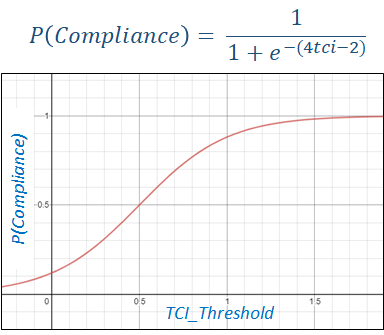

In [21]:
from math import exp
p_compliance=1 / (1 +exp(-4*tci_threshold+2))
1-p_compliance
p_x_compliance=1/m
p_x_not_compliance=1/(n1+m)
Lik=p_x_compliance*p_compliance + p_x_not_compliance*(1-p_compliance)
print_rule(rule,1)
print ("For n1={},m1={},m={},p(C)={:.5f}".format(n1,m1,m,p_compliance))
print ("--------------Likelihood of Norm={:.8f}--------------".format(Lik))

------------------------------------------------
                NORM Number=1
------------------------------------------------
    OBLIGATORY to
    TRASH R-SQUAREs
    if you PICKUP R-SQUAREs

For n1=15552,m1=15552,m=15552,p(C)=0.68997
--------------Likelihood of Norm=0.00005433--------------
